In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid", palette="pastel")

In [2]:
df = pl.read_csv(
    "/home/gruengroup/christian/Projects/Experiments/Projects/spatial_transcriptomics_integration/feature_prediction/output/2025-12-19_01-53-52-073_experiment_cell_metrics.csv"
)
df = df.with_columns(
    [
        (pl.col("exp_var_dominic") - 1).abs().alias("exp_var_dominic_transformed"),
        (pl.col("exp_var_scikit") - 1).abs().alias("exp_var_scikit_transformed"),
    ]
)
print(df)

shape: (298_248, 21)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ dataset_n ┆ spatial_d ┆ spatial_d ┆ sc_data_p ┆ … ┆ spearmanr ┆ cosine_si ┆ exp_var_d ┆ exp_var_ │
│ ame       ┆ ata_path  ┆ ata       ┆ ath       ┆   ┆ ---       ┆ m         ┆ ominic_tr ┆ scikit_t │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ ---       ┆ ansformed ┆ ransform │
│ str       ┆ str       ┆ str       ┆ str       ┆   ┆           ┆ f64       ┆ ---       ┆ ed       │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.225823  ┆ 0.011495  ┆ 1.742666  ┆ 1.73985  │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆     

In [3]:
METRICS = [
    ("mse", "log"),
    ("exp_var_dominic_transformed", "log"),
    ("exp_var_scikit_transformed", "log"),
    ("pearsonr", "lin"),
    ("spearmanr", "lin"),
    ("cosine_sim", "lin"),
]

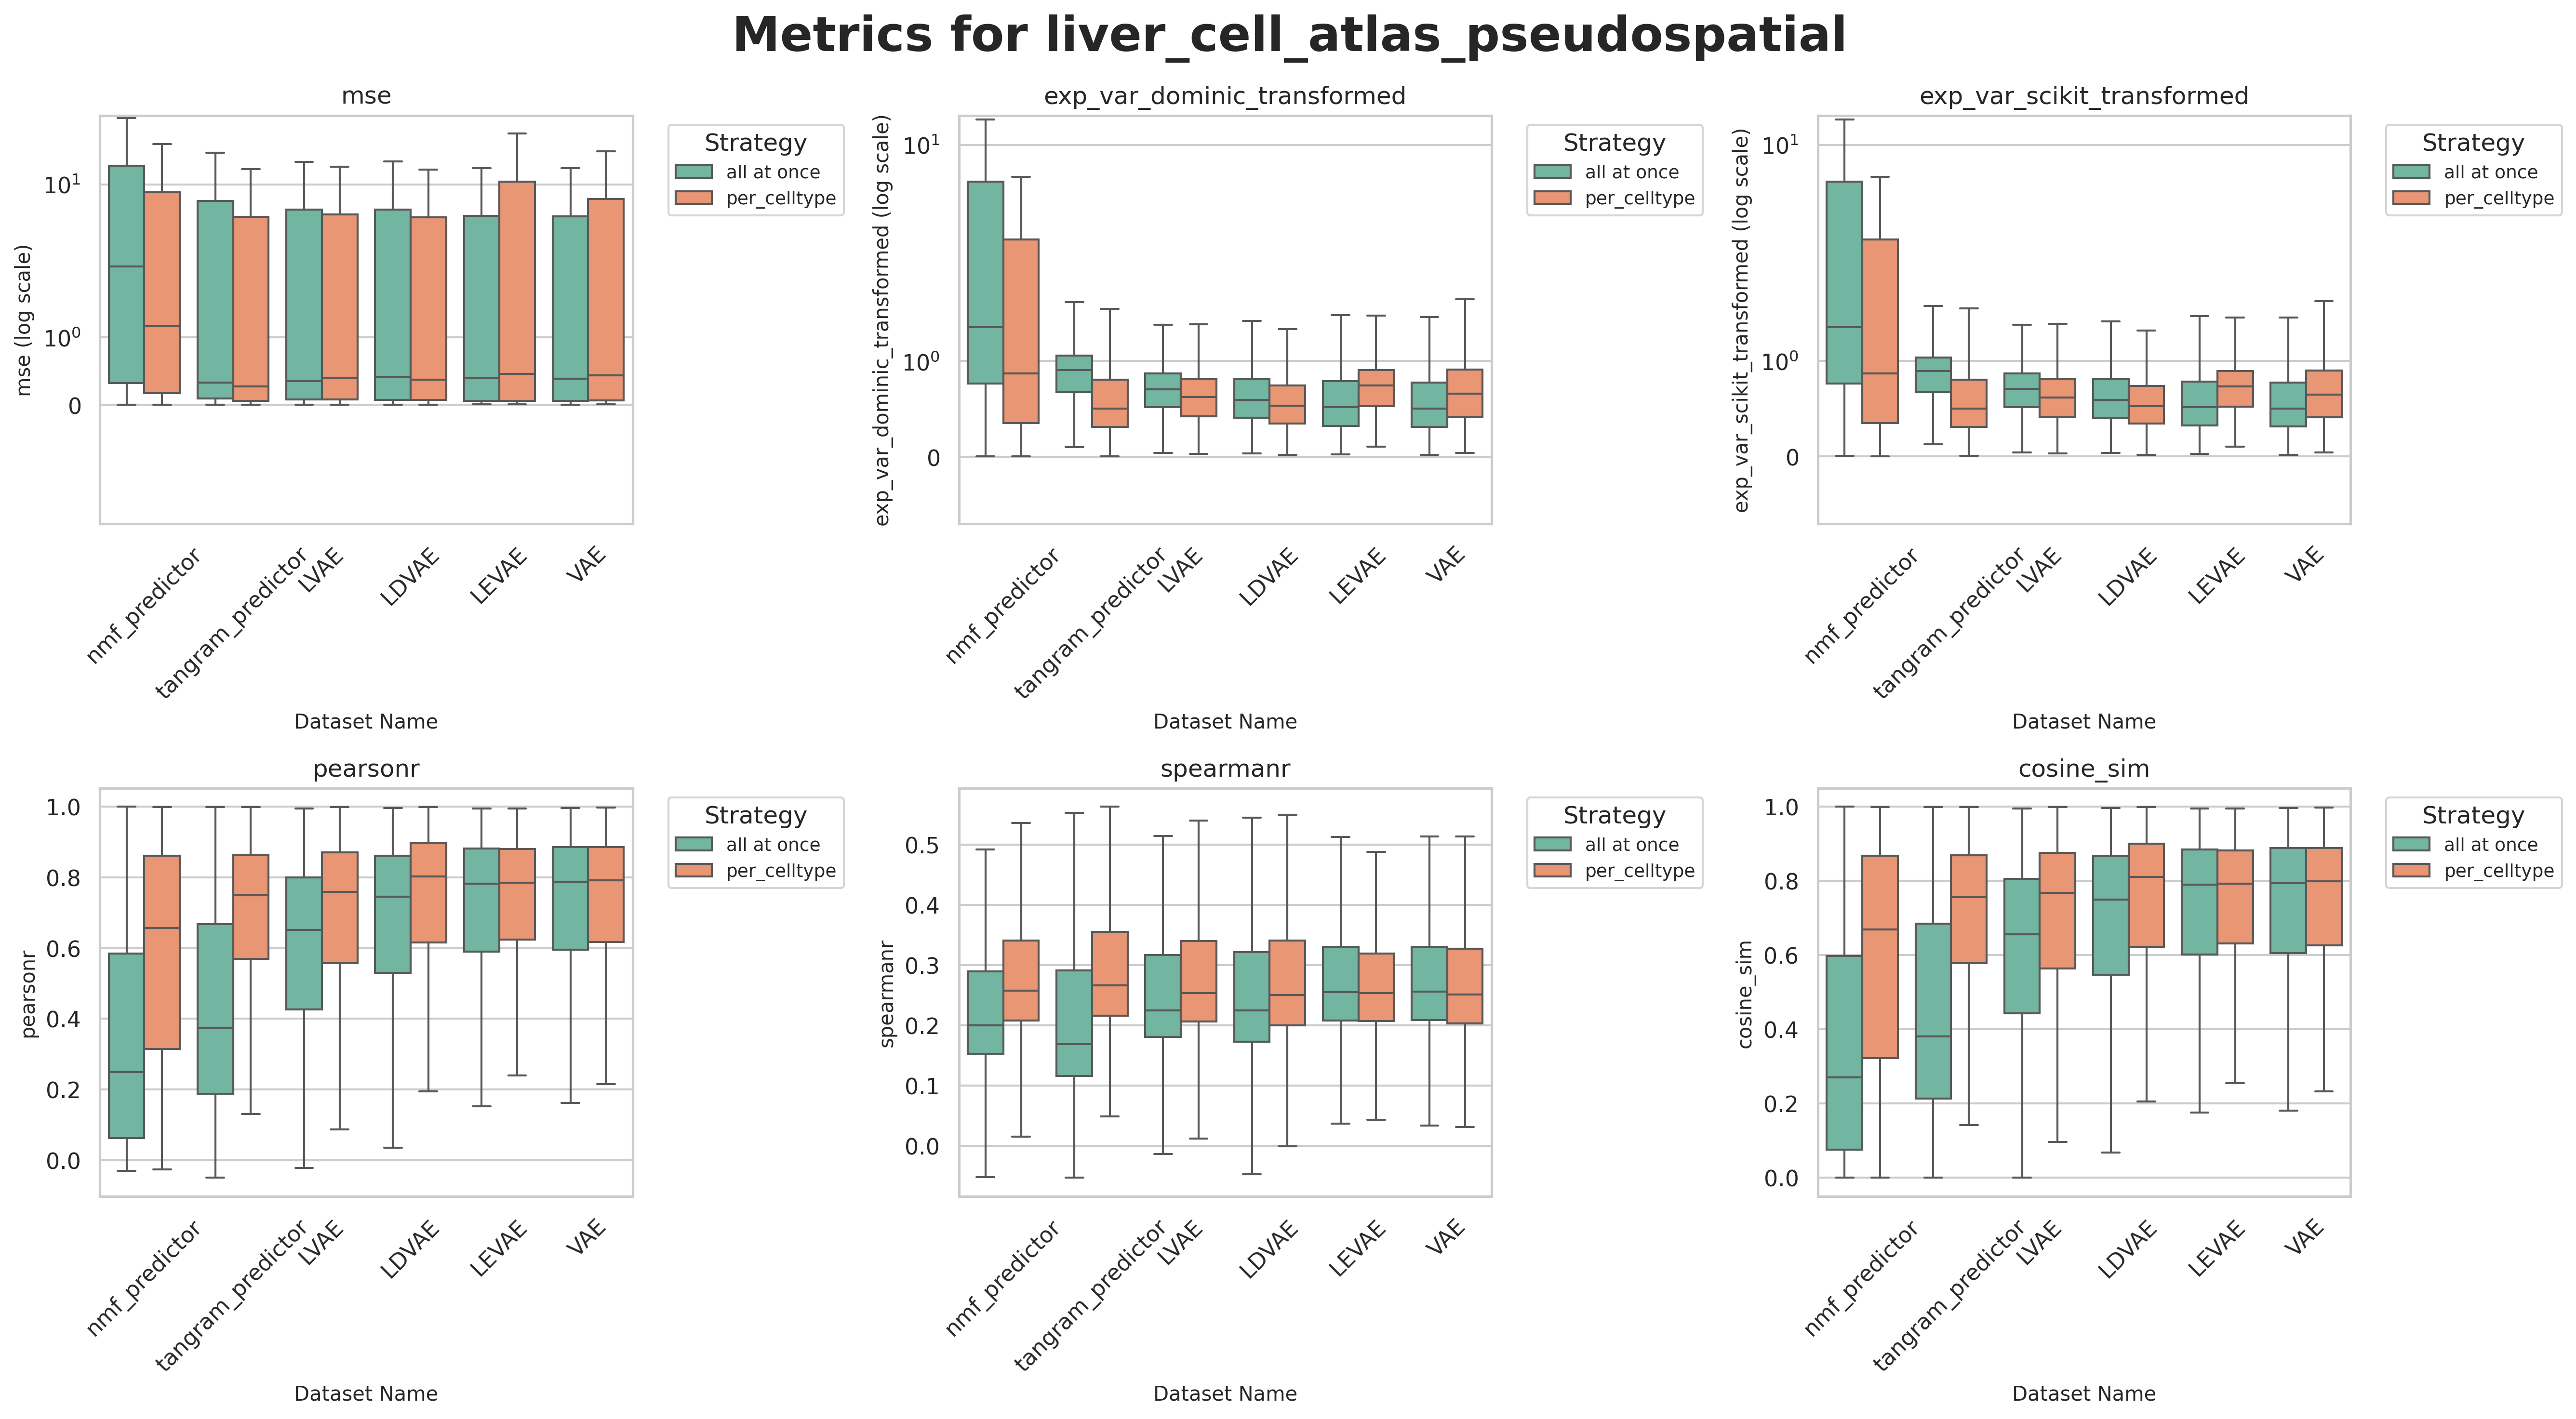

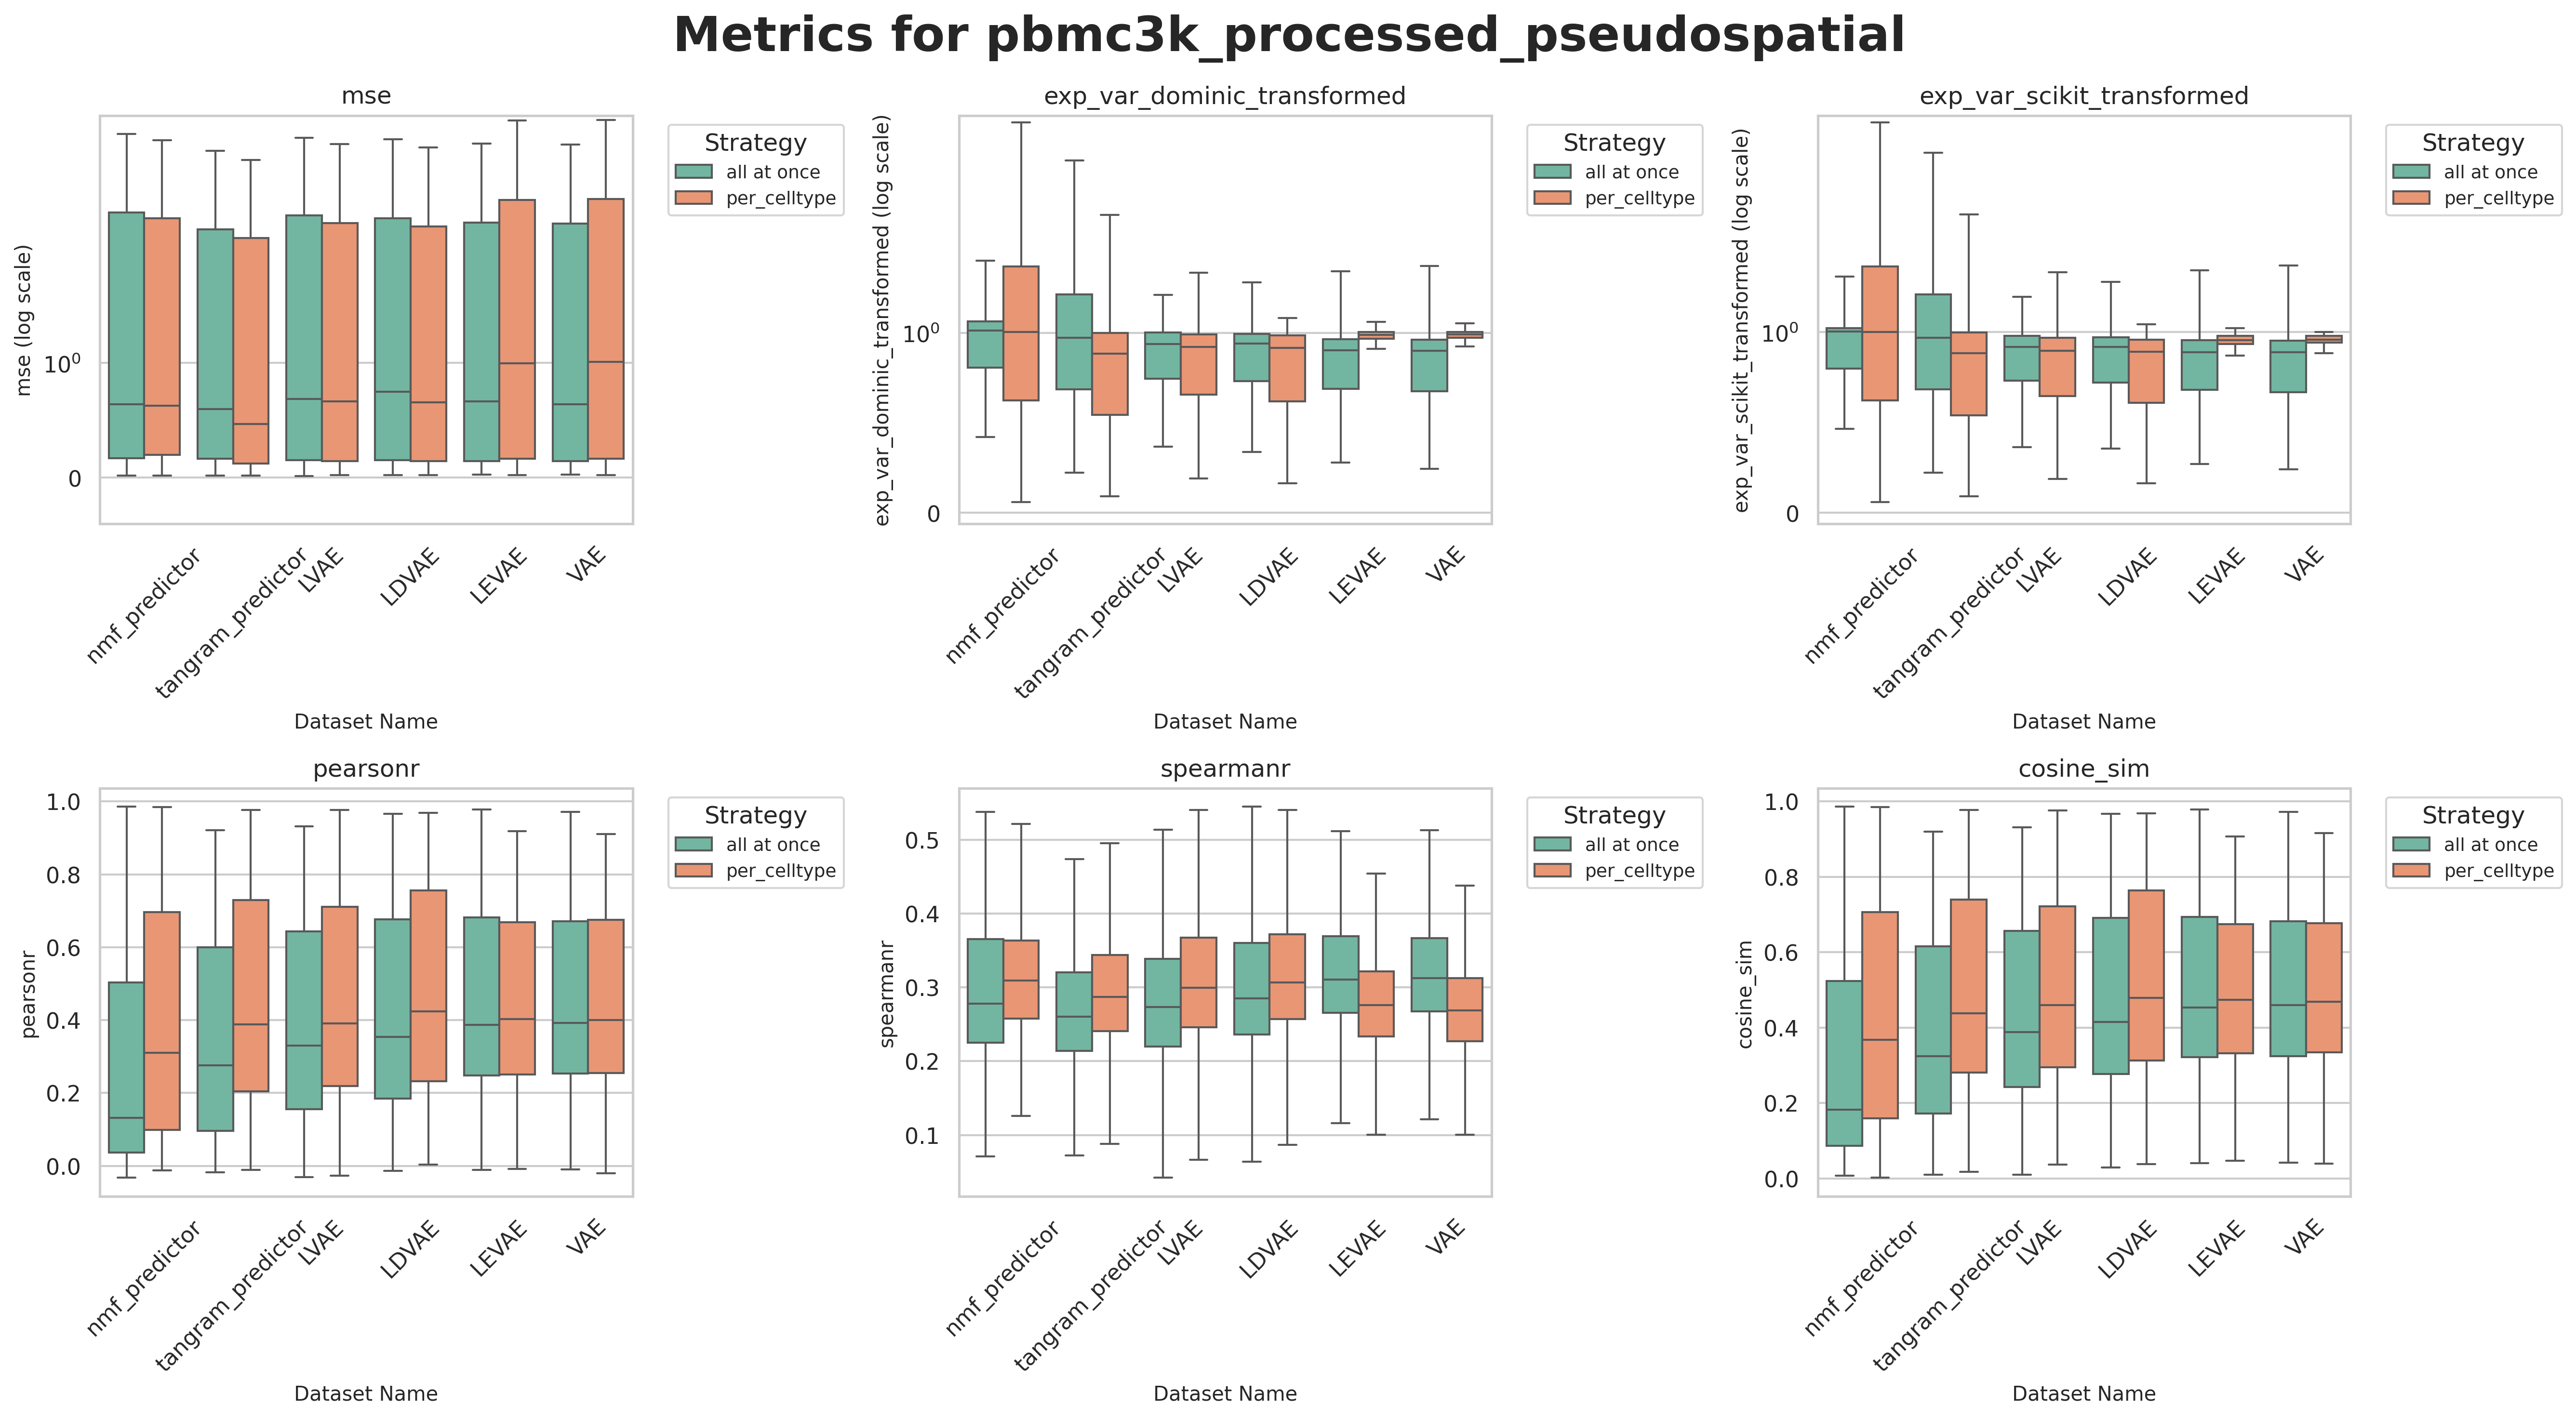

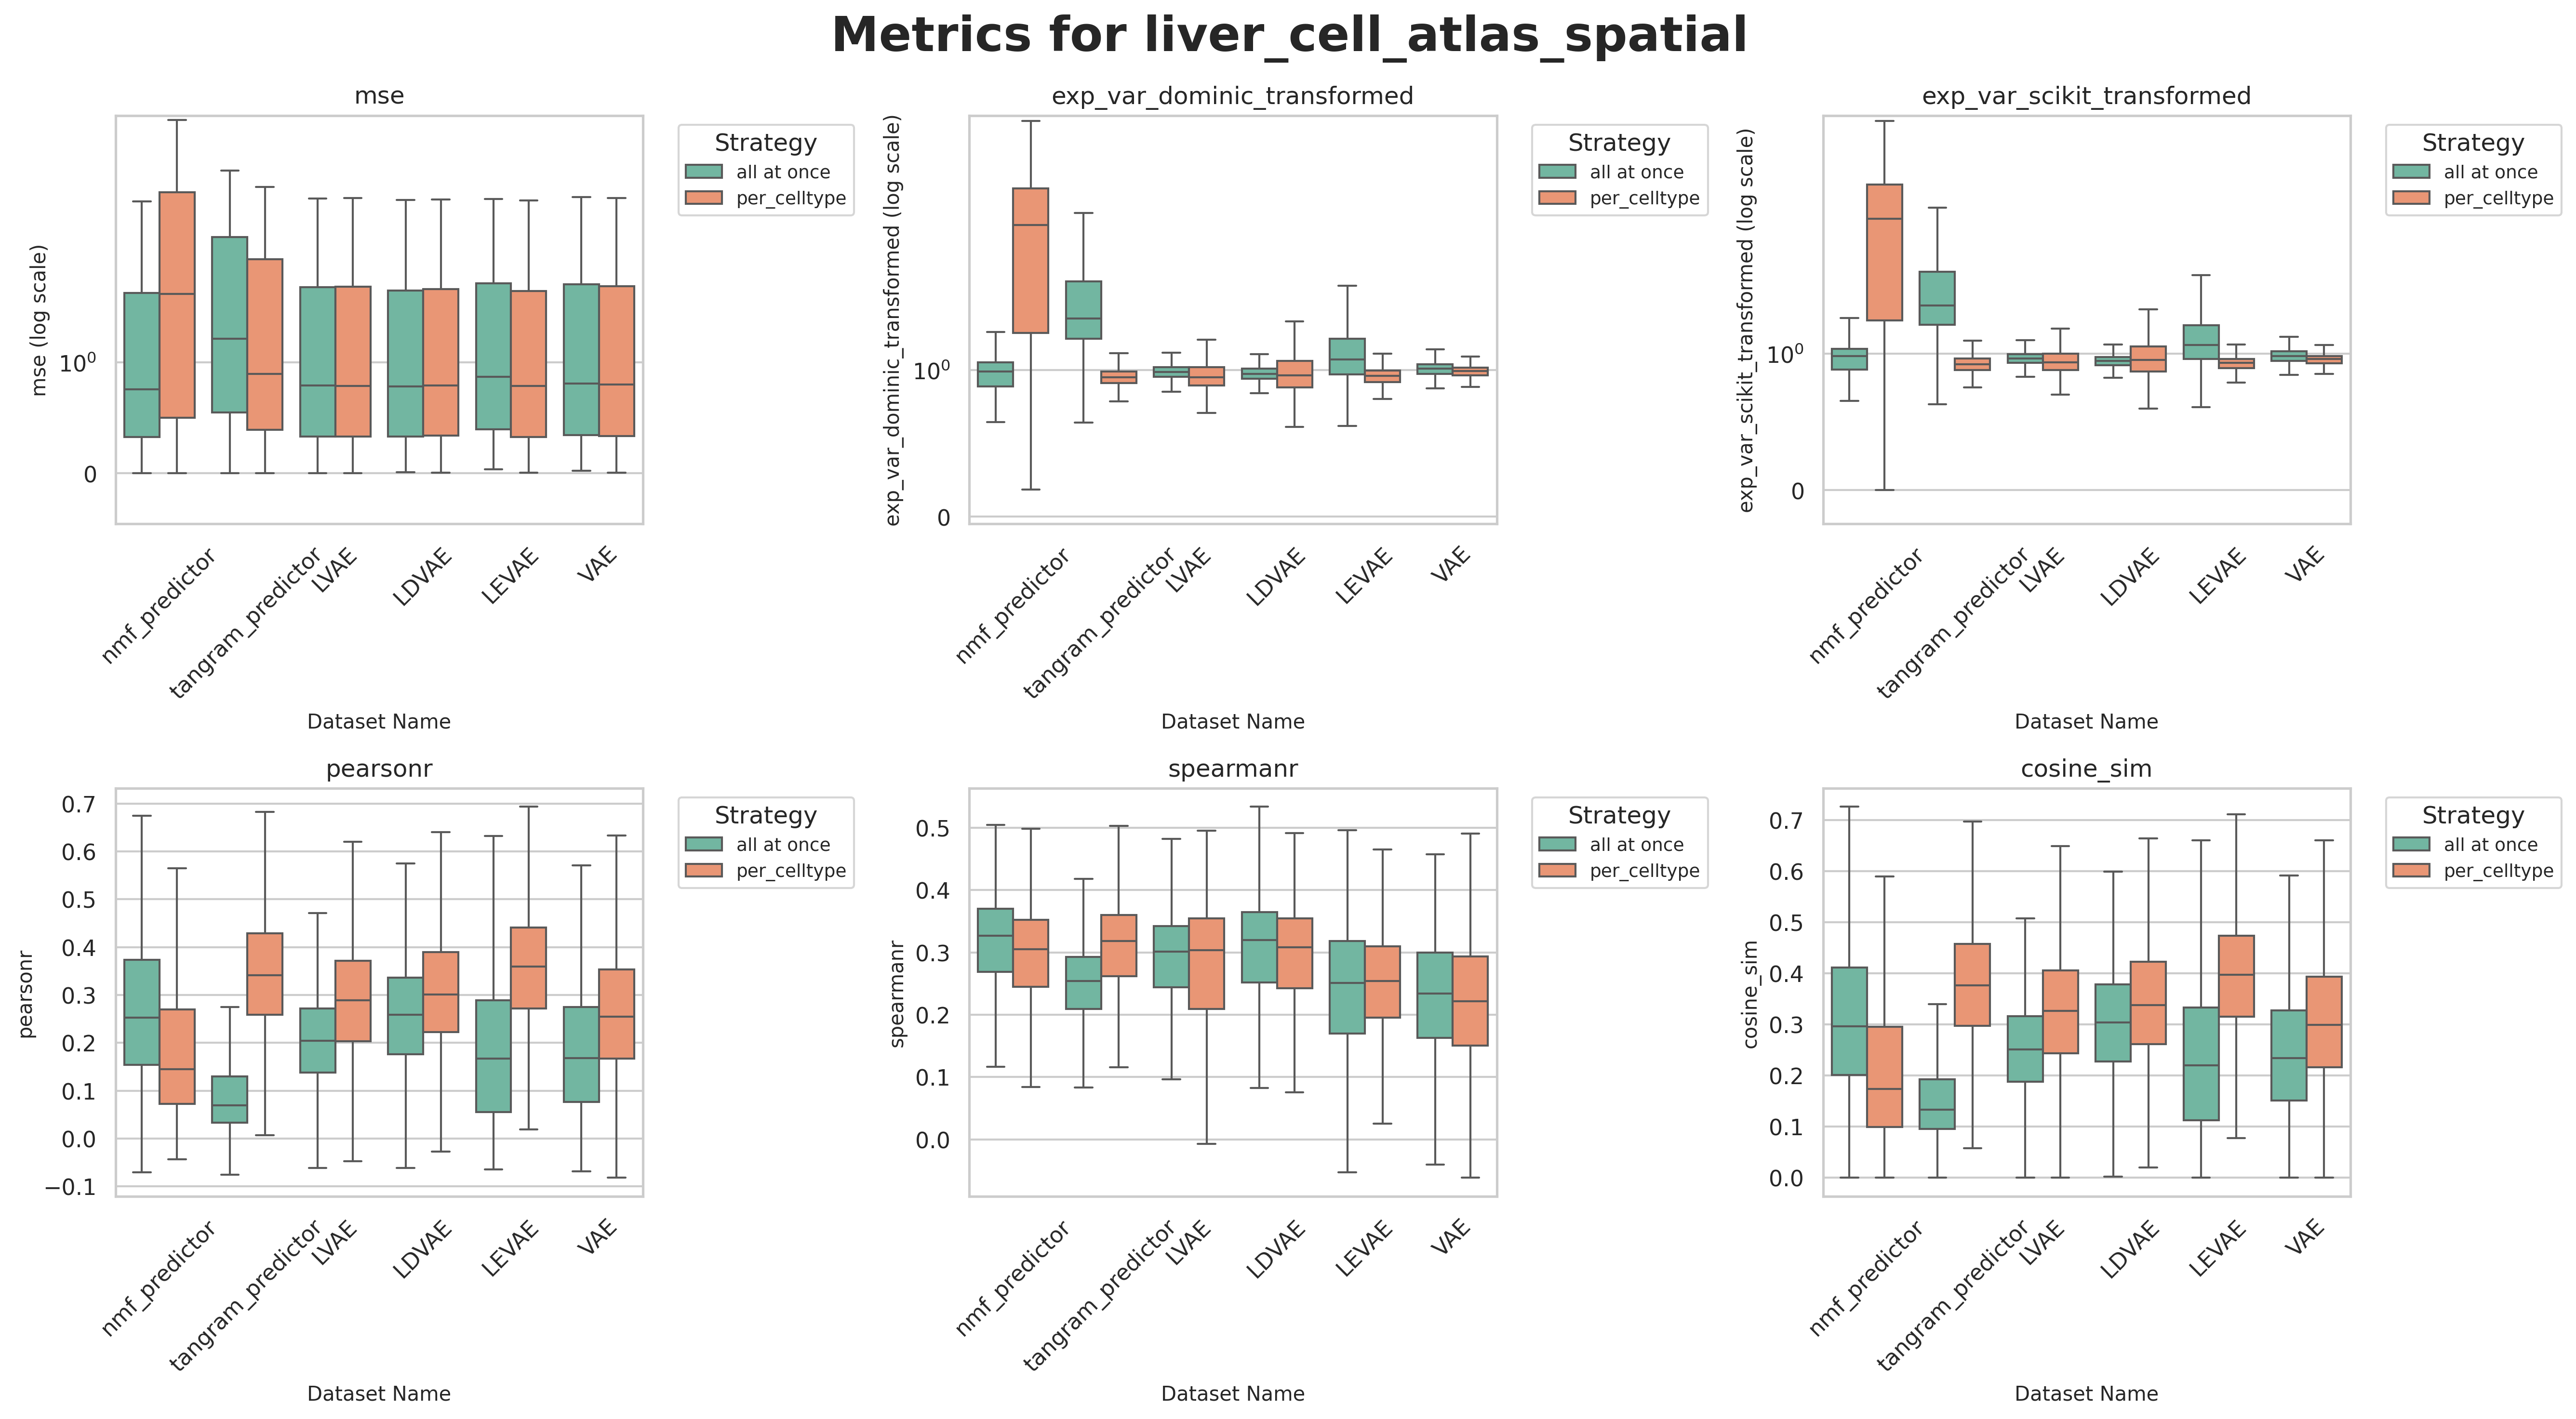

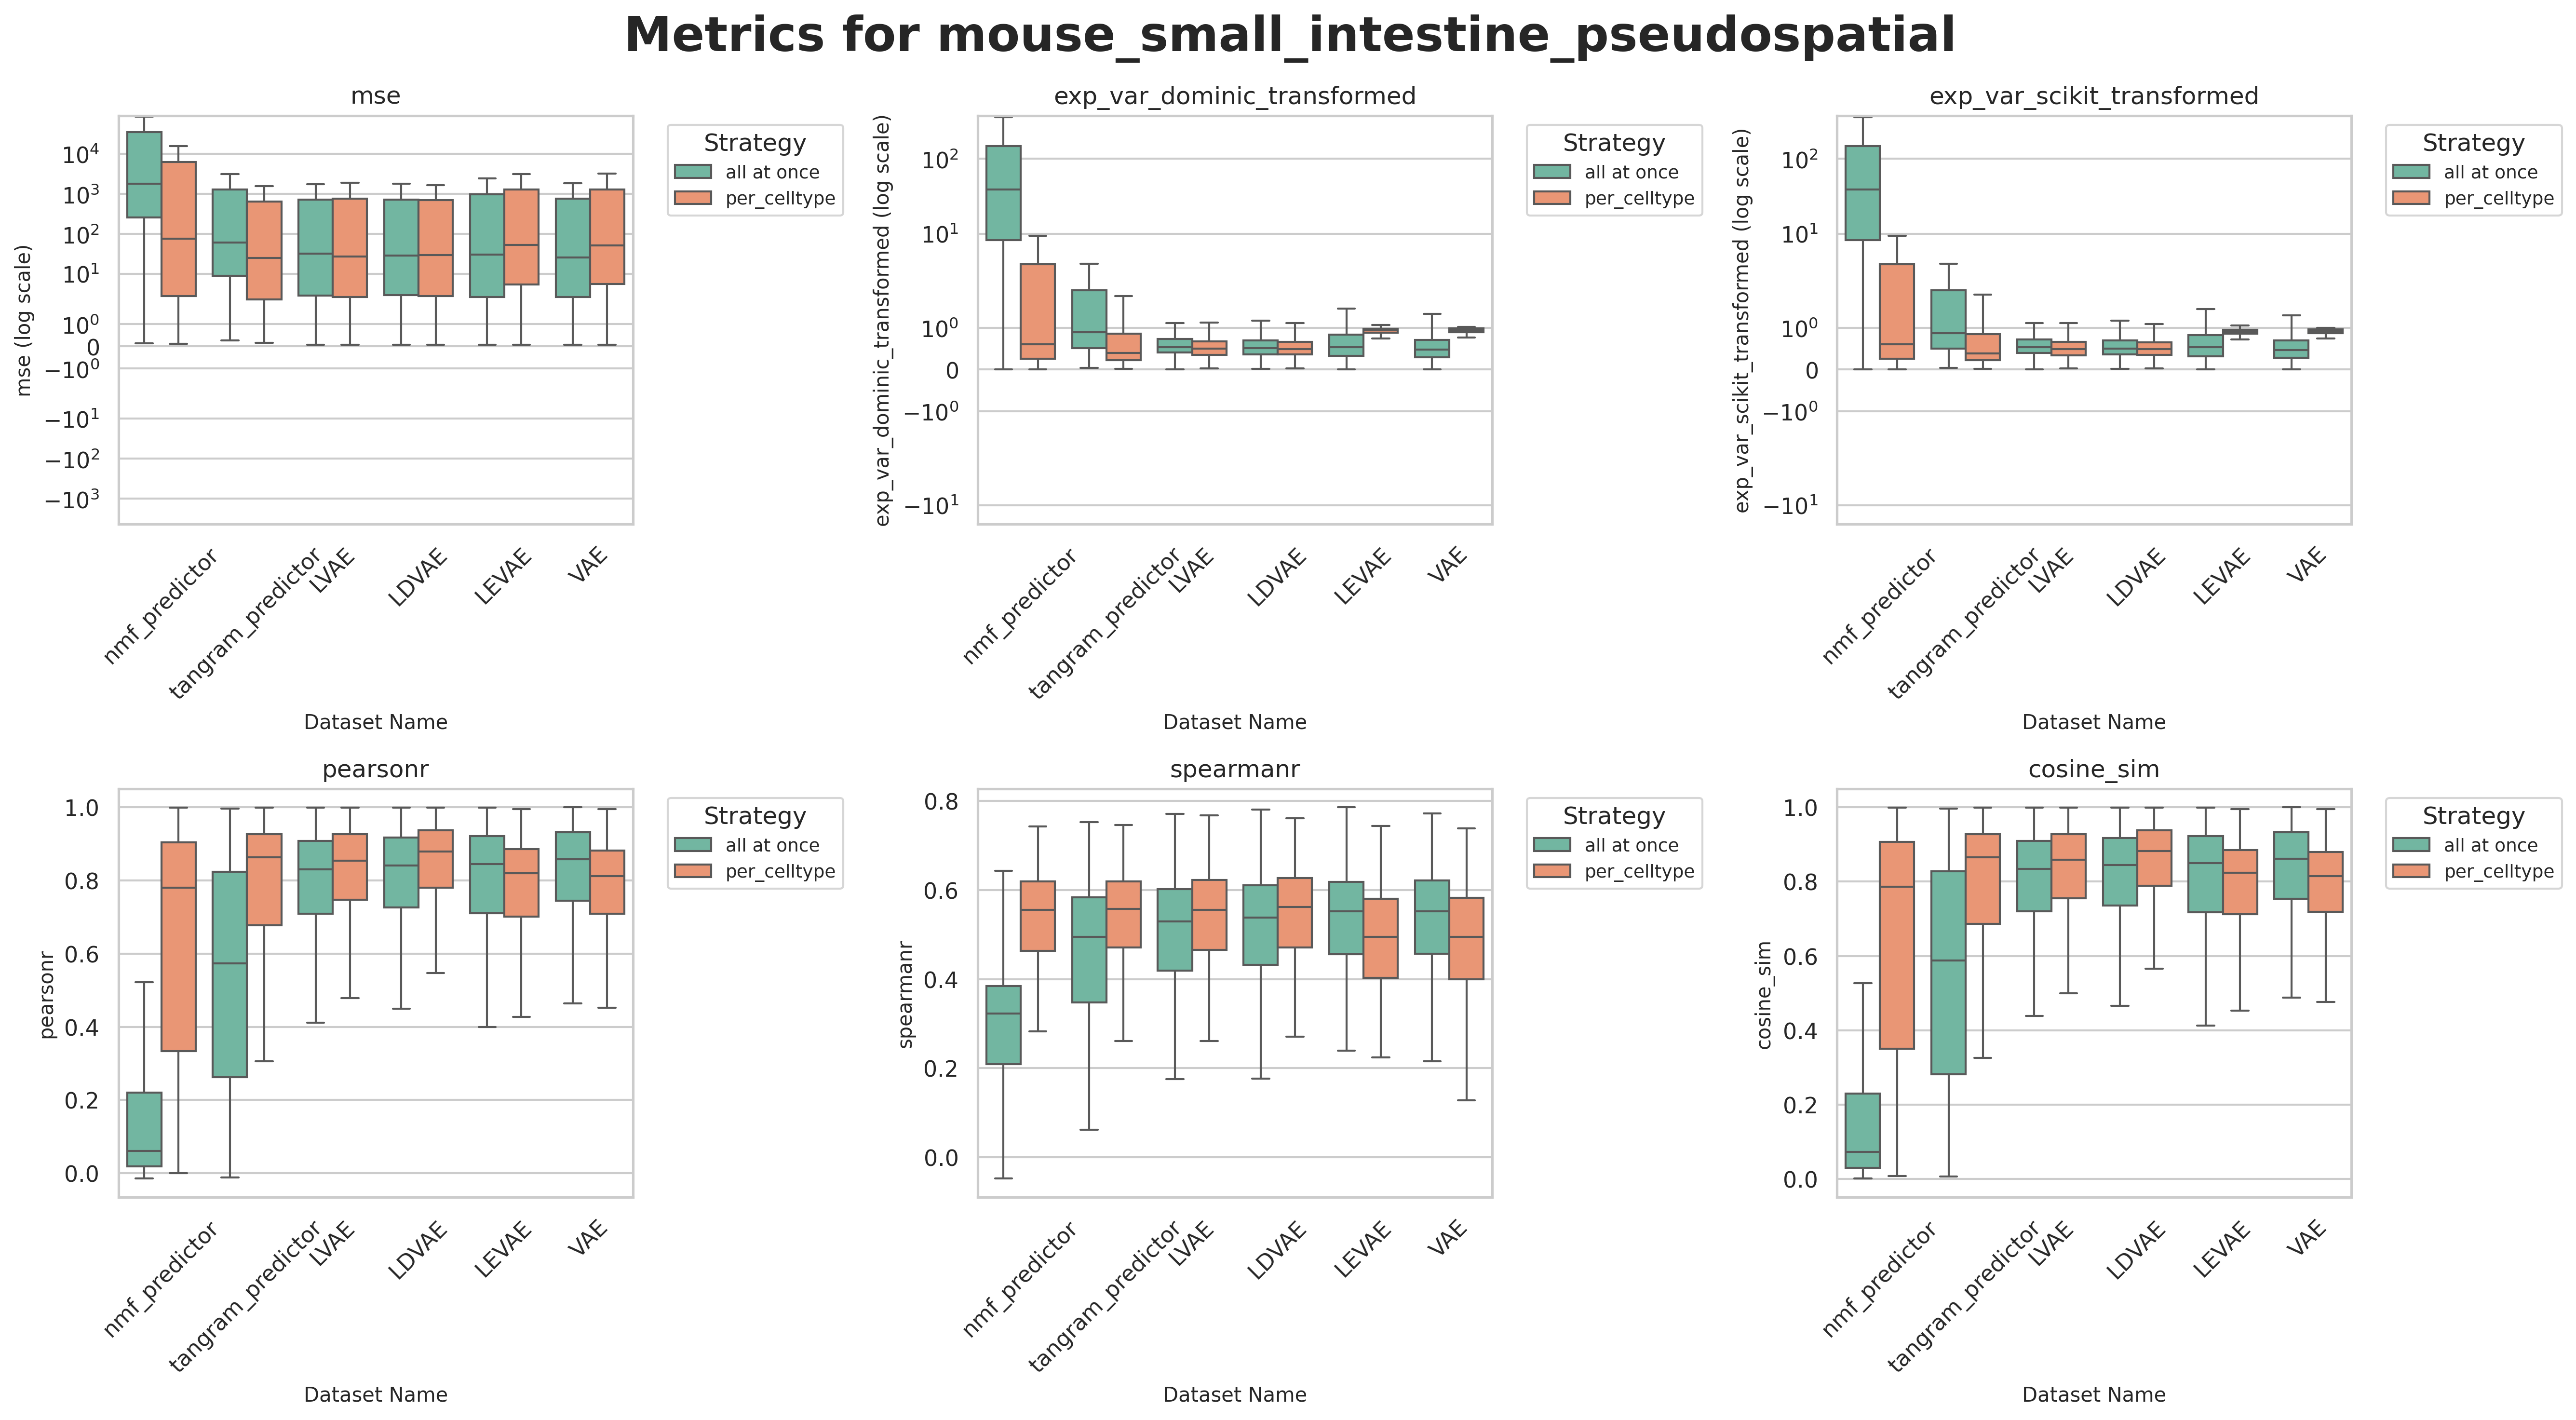

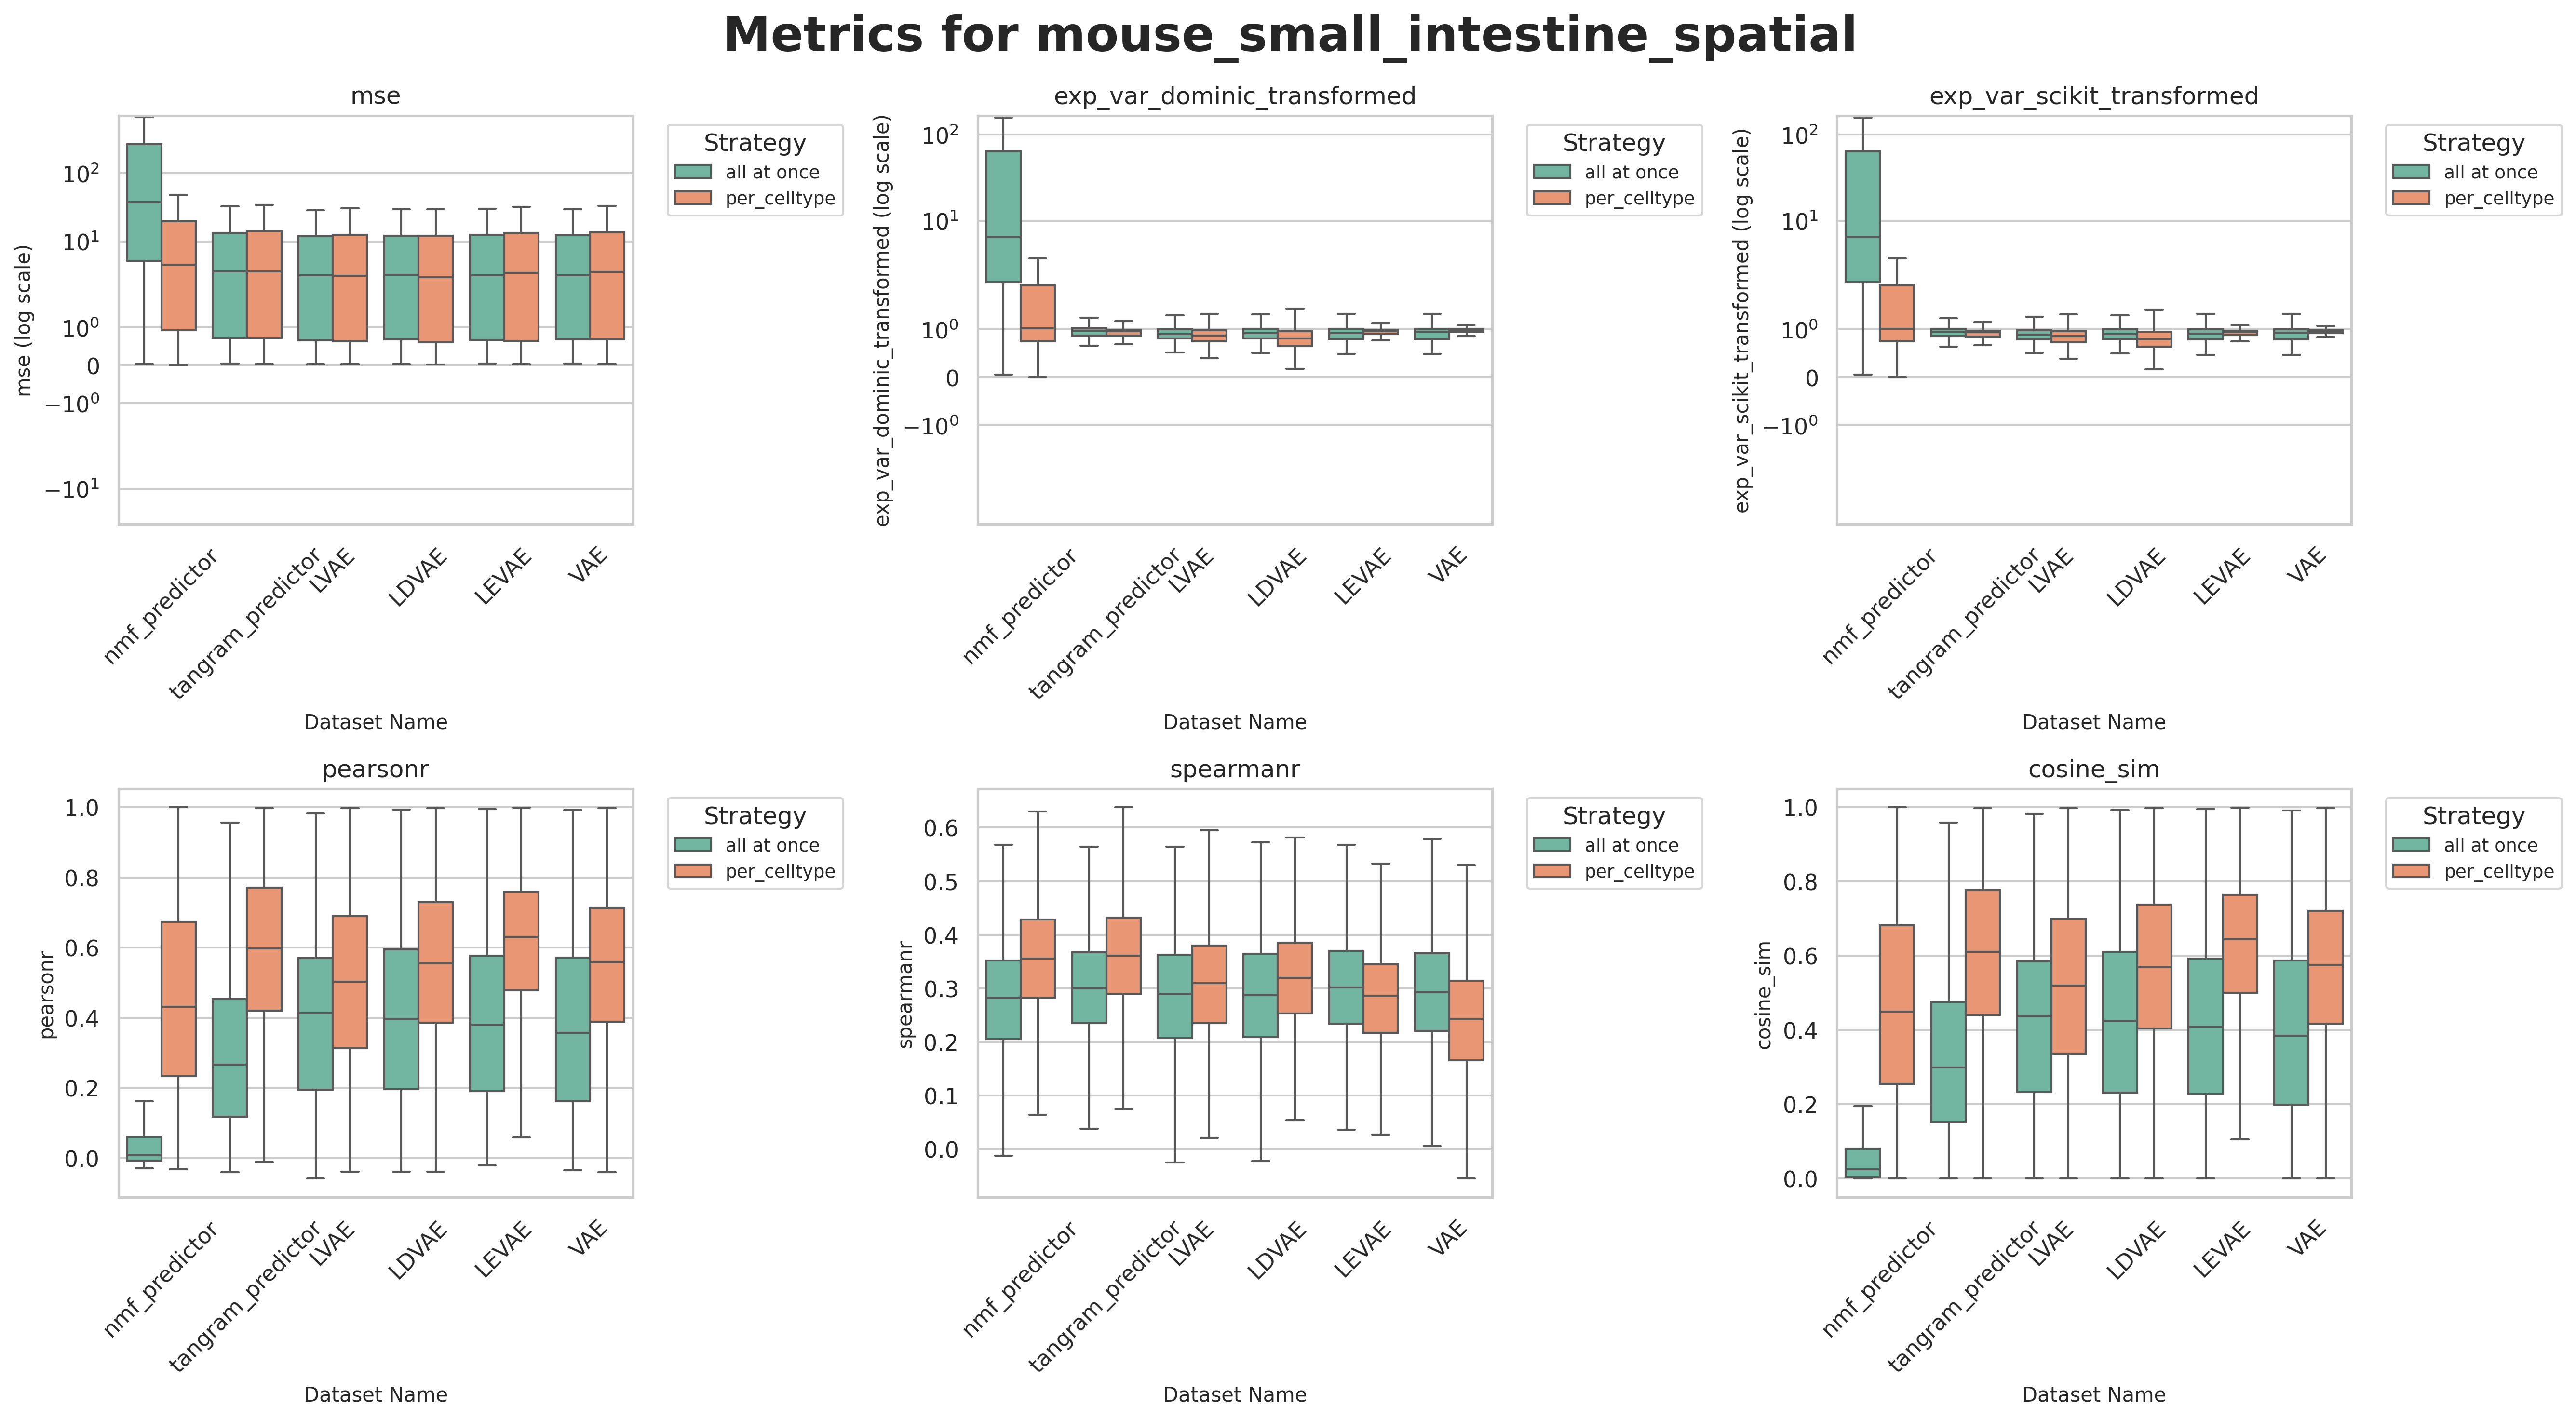

In [7]:
for dataset_name in df["dataset_name"].unique().to_list():
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=300)
    axes = axes.flatten()
    for ax, (metric, scale) in zip(axes, METRICS):
        sns.boxplot(
            data=df.filter(pl.col("dataset_name") == dataset_name),
            x="predictor_name",
            y=metric,
            hue="reconstruction_strategy",
            palette="Set2",
            linewidth=1,
            showfliers=False,
            ax=ax,
        )
    
        if scale == "log":
            ax.set_yscale("symlog")
            ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
        else:
            ax.set_ylabel(metric, fontsize=10)
    
        ax.set_xlabel("Dataset Name", fontsize=10)
        ax.set_title(metric, fontsize=12)
        ax.tick_params(axis="x", rotation=45)
    
        ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
    plt.suptitle(
        f"Metrics for {dataset_name}",
        fontsize=24,
        fontweight="bold",
    )
    plt.tight_layout()
    plt.show()

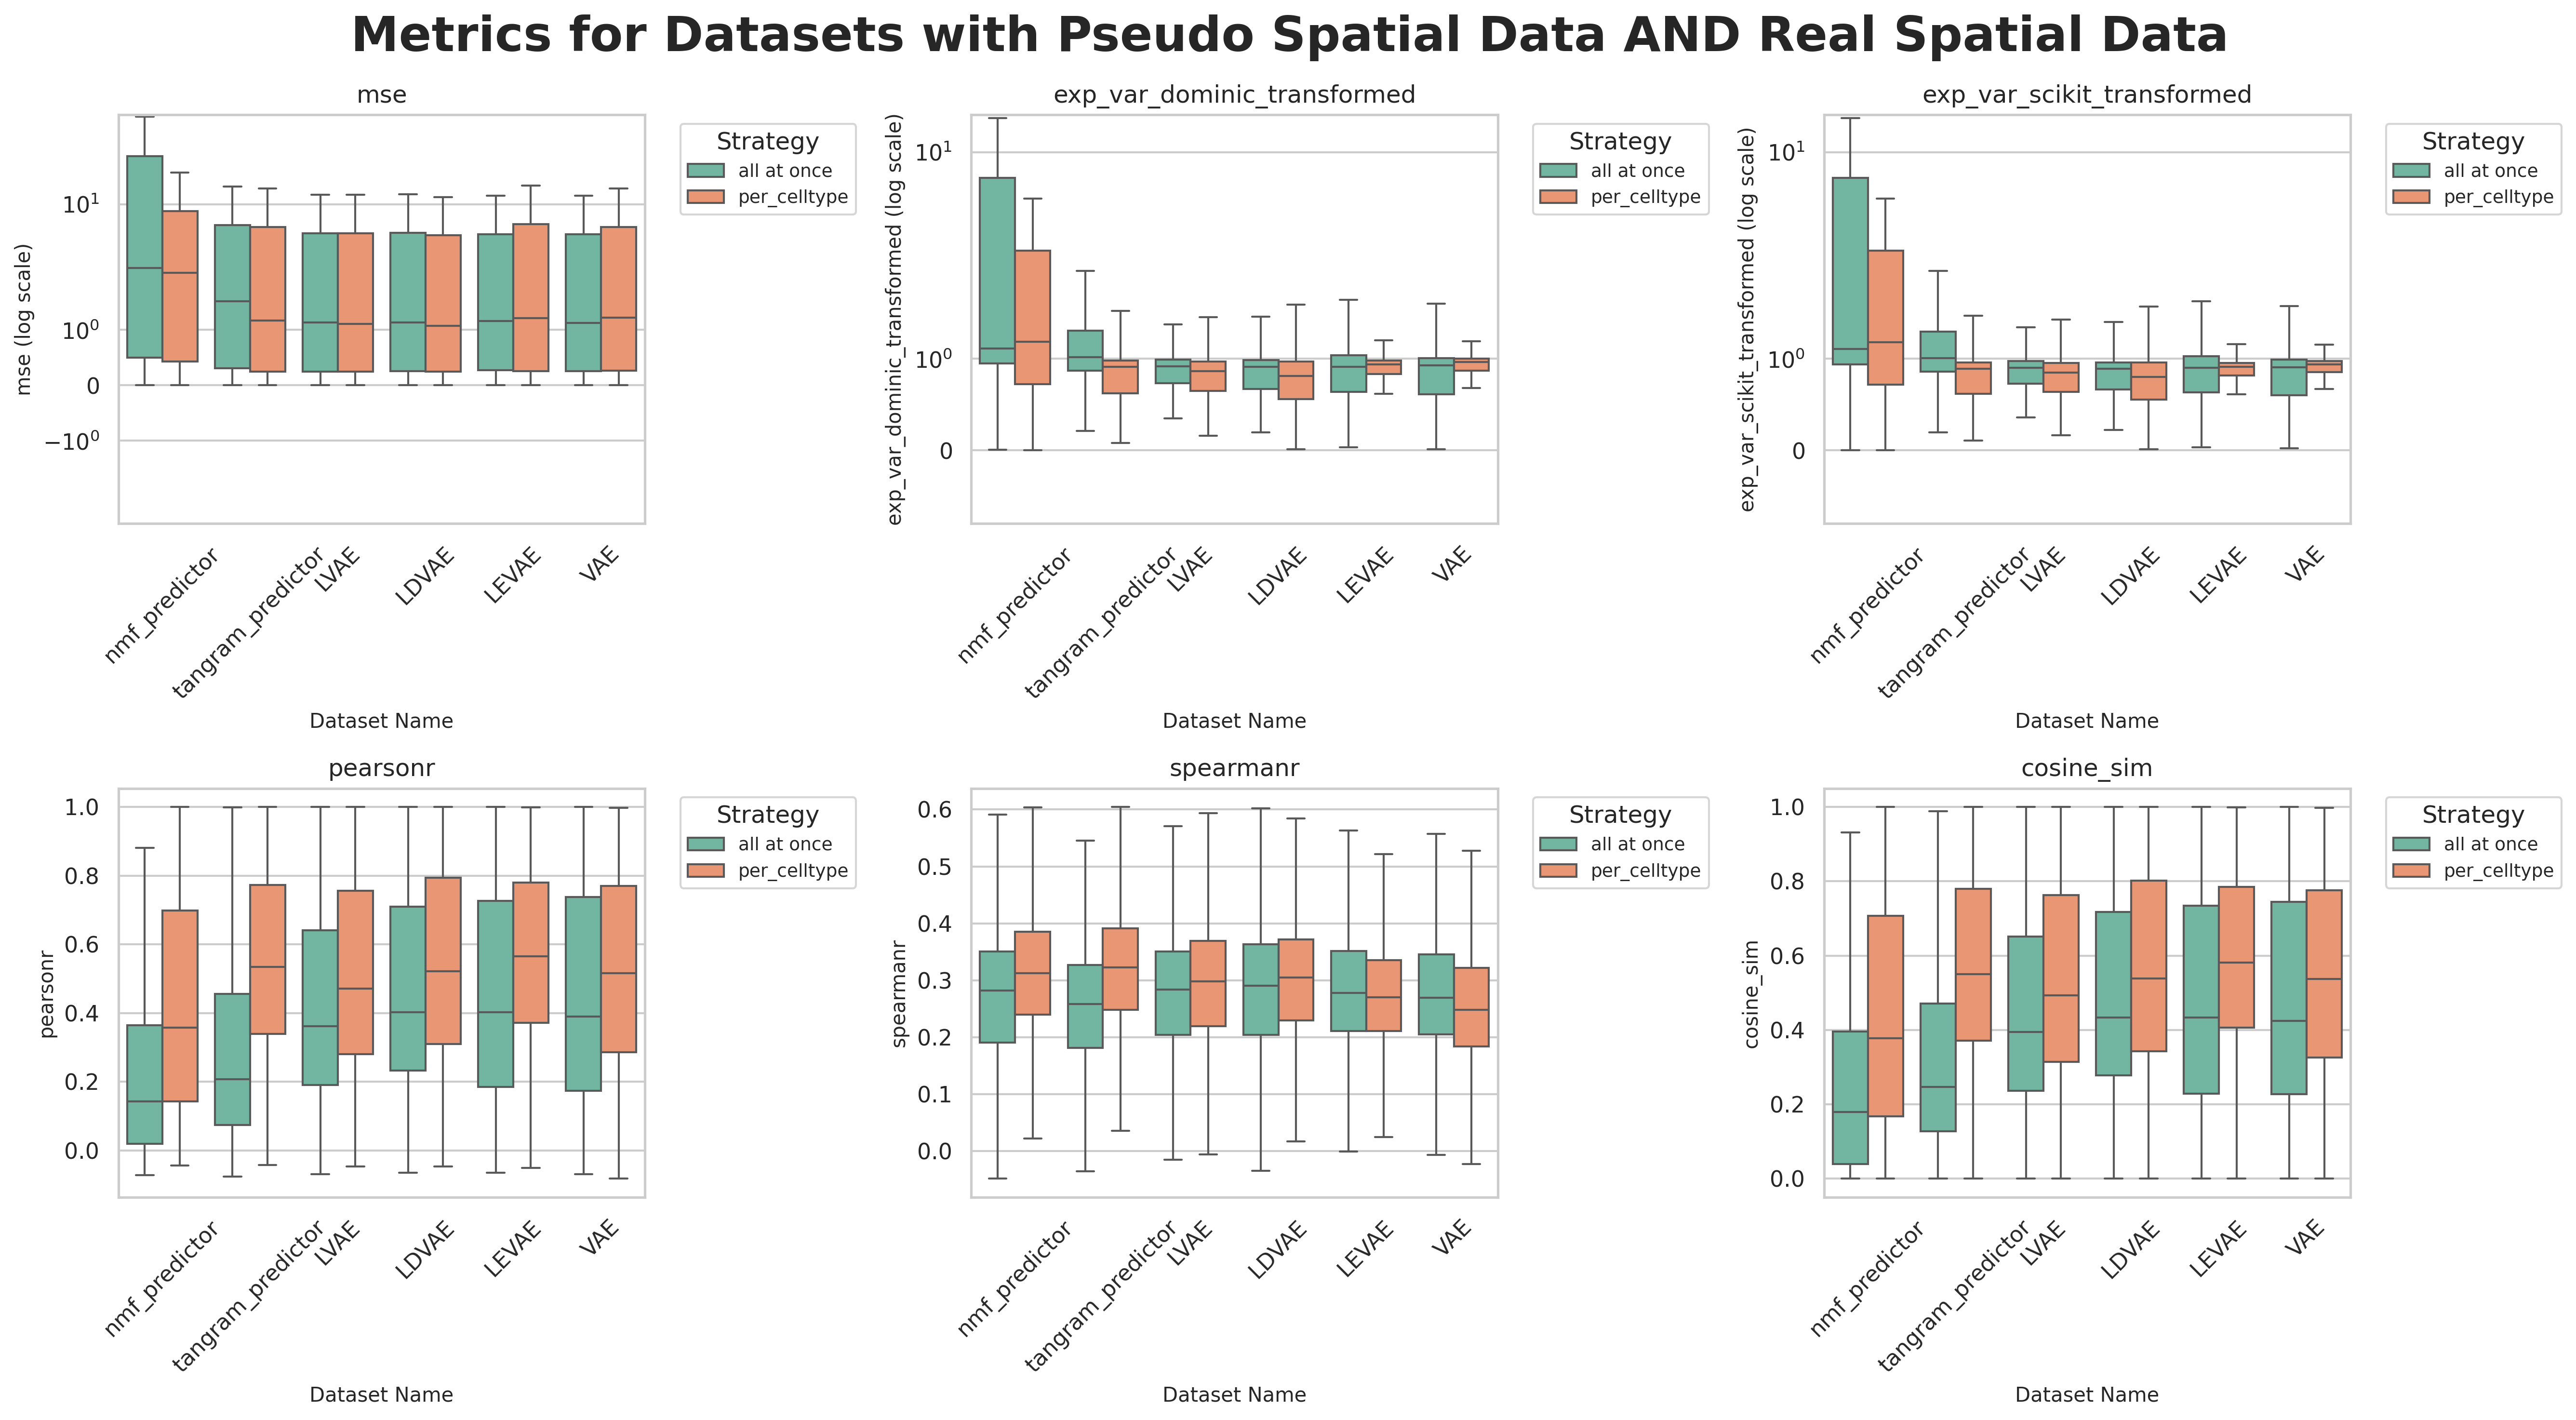

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=300)
axes = axes.flatten()

for ax, (metric, scale) in zip(axes, METRICS):
    sns.boxplot(
        data=df,
        x="predictor_name",
        y=metric,
        hue="reconstruction_strategy",
        palette="Set2",
        linewidth=1,
        showfliers=False,
        ax=ax,
    )

    if scale == "log":
        ax.set_yscale("symlog")
        ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
    else:
        ax.set_ylabel(metric, fontsize=10)

    ax.set_xlabel("Dataset Name", fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.tick_params(axis="x", rotation=45)

    ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
plt.suptitle(
    "Metrics for Datasets with Pseudo Spatial Data AND Real Spatial Data",
    fontsize=24,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

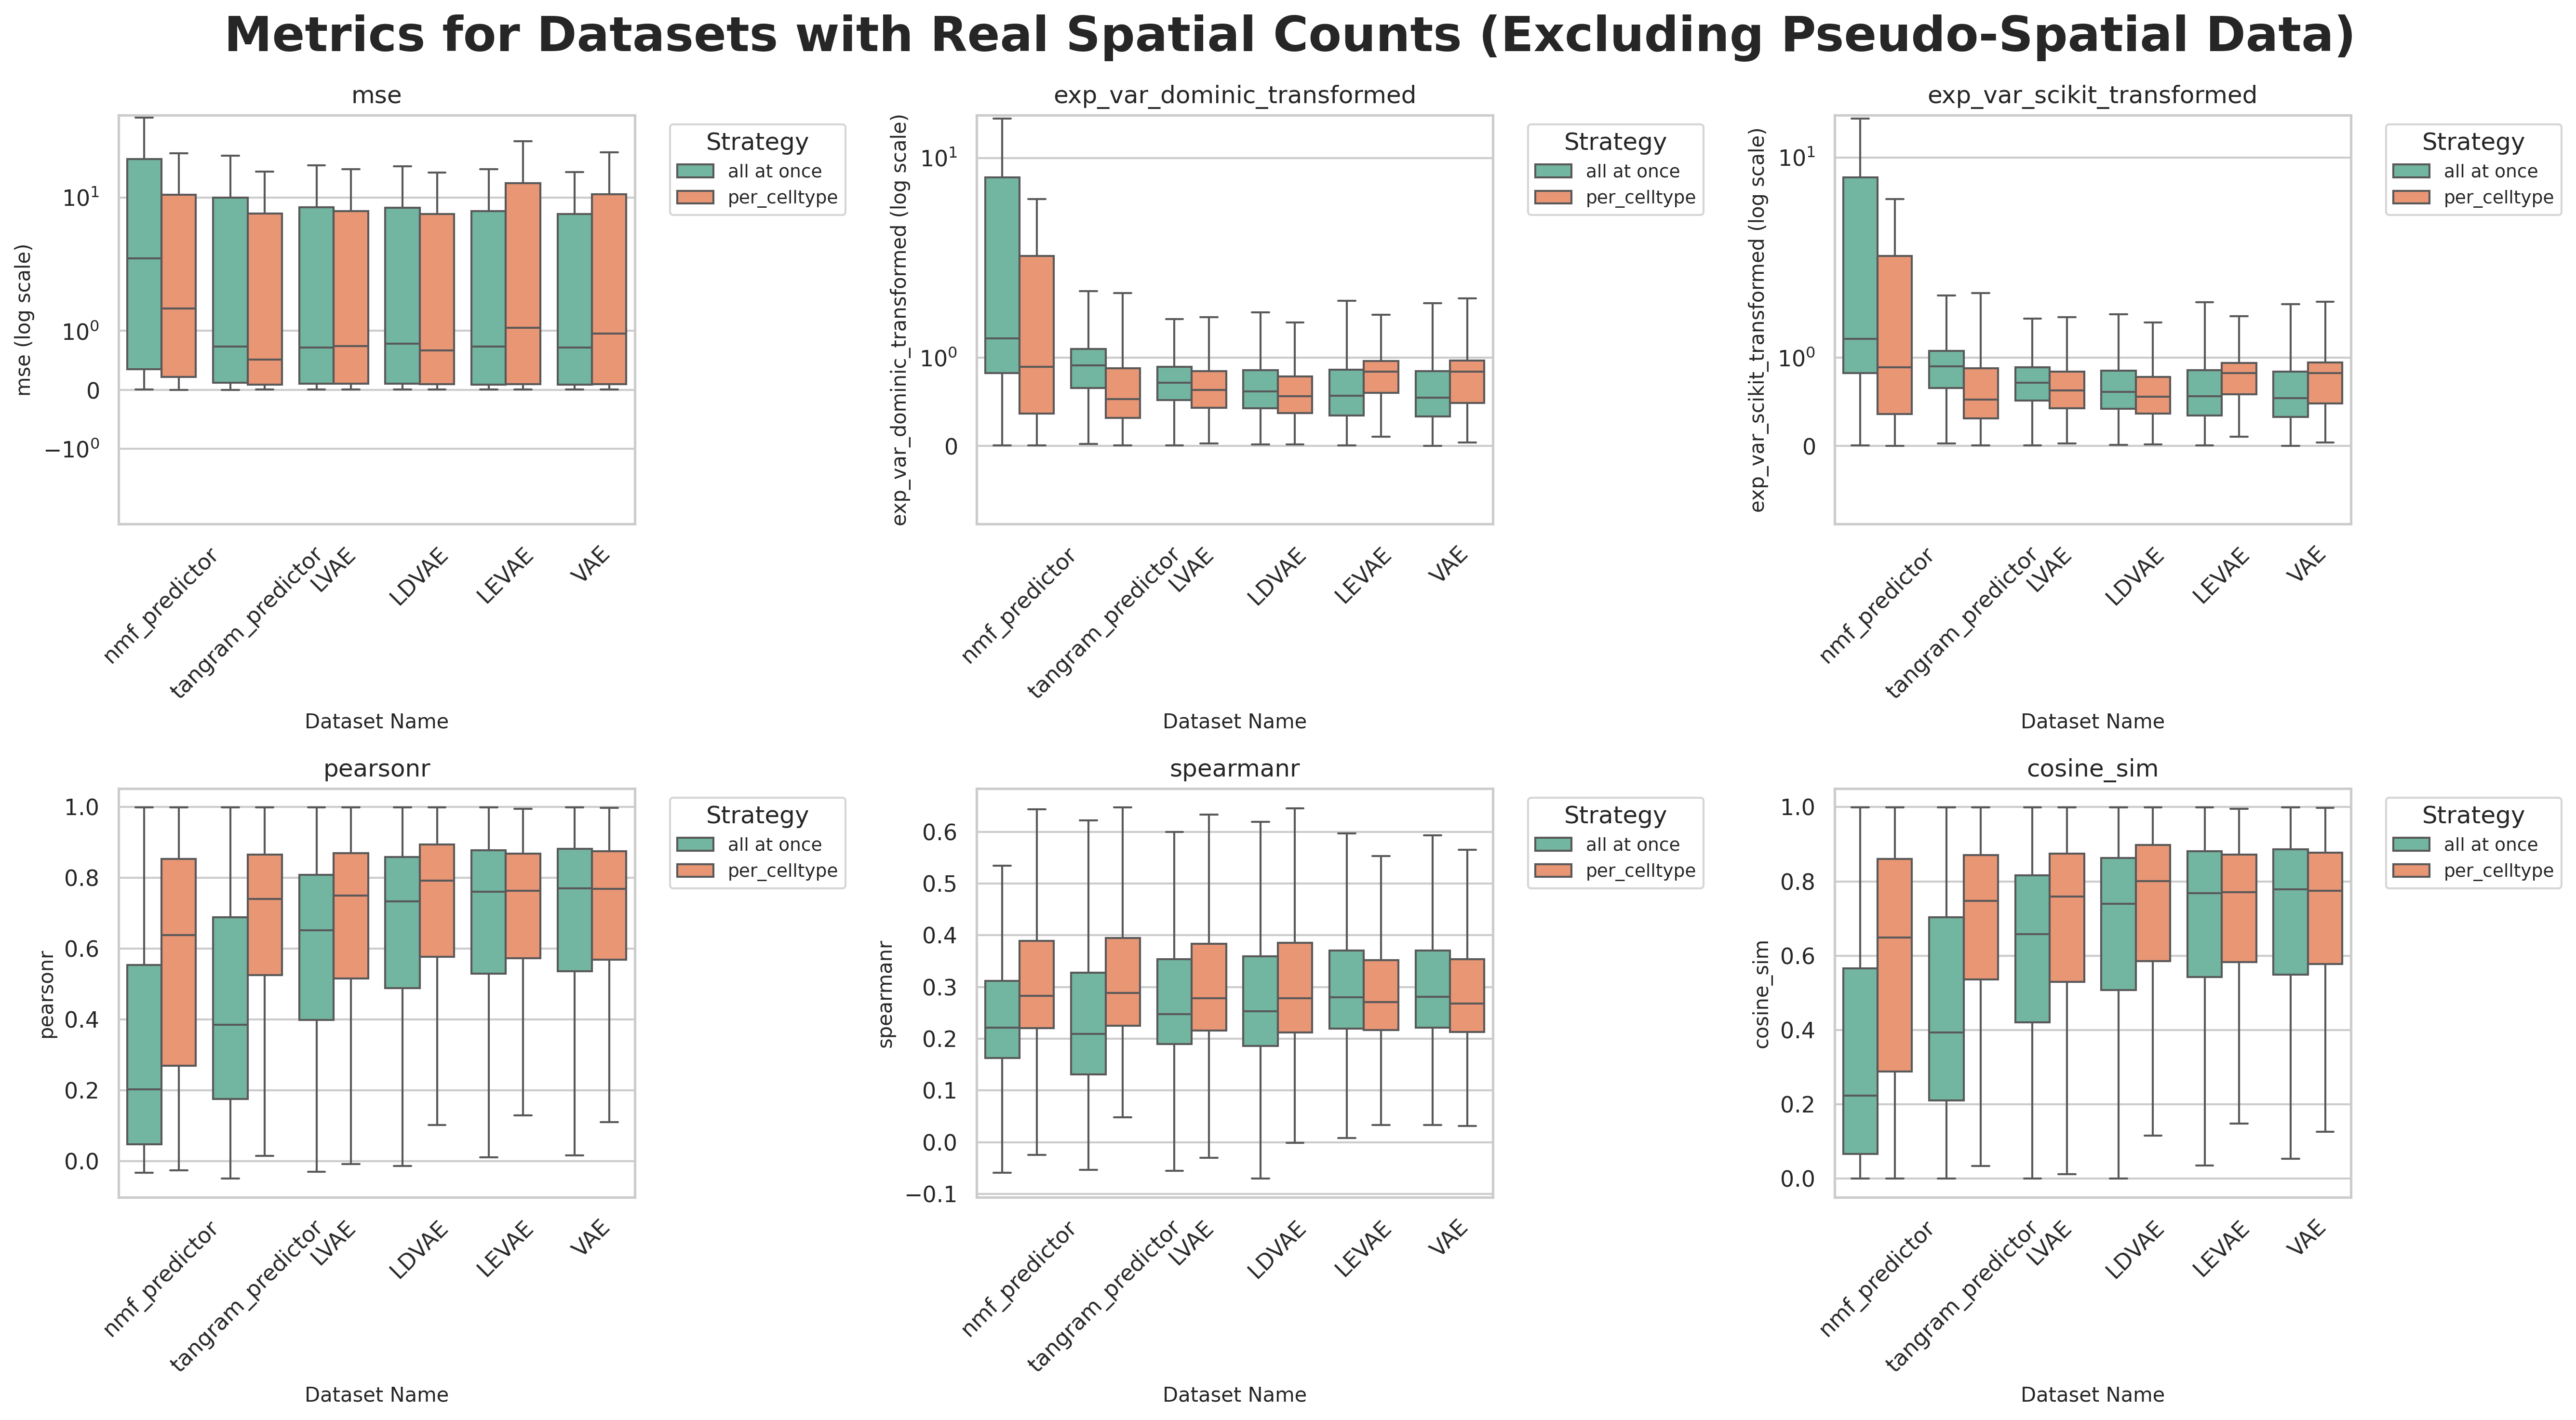

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=300)
axes = axes.flatten()

for ax, (metric, scale) in zip(axes, METRICS):
    sns.boxplot(
        data=df.filter(pl.col("spatial_data") == "pseudo"),
        x="predictor_name",
        y=metric,
        hue="reconstruction_strategy",
        palette="Set2",
        linewidth=1,
        showfliers=False,
        ax=ax,
    )

    if scale == "log":
        ax.set_yscale("symlog")
        ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
    else:
        ax.set_ylabel(metric, fontsize=10)

    ax.set_xlabel("Dataset Name", fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.tick_params(axis="x", rotation=45)

    ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)

plt.suptitle(
    "Metrics for Datasets with Real Spatial Counts (Excluding Pseudo-Spatial Data)",
    fontsize=24,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

In [26]:
df

shape: (298_248, 21)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ dataset_n ┆ spatial_d ┆ spatial_d ┆ sc_data_p ┆ … ┆ spearmanr ┆ cosine_si ┆ exp_var_d ┆ exp_var_ │
│ ame       ┆ ata_path  ┆ ata       ┆ ath       ┆   ┆ ---       ┆ m         ┆ ominic_tr ┆ scikit_t │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ ---       ┆ ansformed ┆ ransform │
│ str       ┆ str       ┆ str       ┆ str       ┆   ┆           ┆ f64       ┆ ---       ┆ ed       │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.225823  ┆ 0.011495  ┆ 1.742666  ┆ 1.73985  │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.096073  ┆ 0.012202  ┆ 2.446524  ┆ 2.446412 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.239413  ┆ 0.020105  ┆ 2.561792  ┆ 2.561666 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.157323  ┆ 0.000131  ┆ 3.207321  ┆ 3.206765 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.369906  ┆ 0.003126  ┆ 1158.3674 ┆ 1153.707 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆ 32        ┆ 153      │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ pbmc3k_pr ┆ null      ┆ pseudo    ┆ pbmc3k_pr ┆ … ┆ 0.233038  ┆ 0.741981  ┆ 0.96782   ┆ 0.932549 │
│ ocessed_p ┆           ┆           ┆ ocessed   ┆   ┆           ┆           ┆           ┆          │
│ seudospat ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ial       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ pbmc3k_pr ┆ null      ┆ pseudo    ┆ pbmc3k_pr ┆ … ┆ 0.254673  ┆ 0.3902    ┆ 0.997959  ┆ 0.974903 │
│ ocessed_p ┆           ┆           ┆ ocessed   ┆   ┆           ┆           ┆           ┆          │
│ seudospat ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ial       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ pbmc3k_pr ┆ null      ┆ pseudo    ┆ pbmc3k_pr ┆ … ┆ 0.308914  ┆ 0.216848  ┆ 1.012675  ┆ 0.994296 │
│ ocessed_p ┆           ┆           ┆ ocessed   ┆   ┆           ┆           ┆           ┆          │
│ seudospat ┆           ┆           ┆   

In [27]:
df = df.with_columns(
    pl.when(pl.col("predictor_name") == "nmf_predictor")
    .then(pl.col("predictor_name"))
    .otherwise(pl.lit("other"))
    .alias("nmf_vs_other")
)

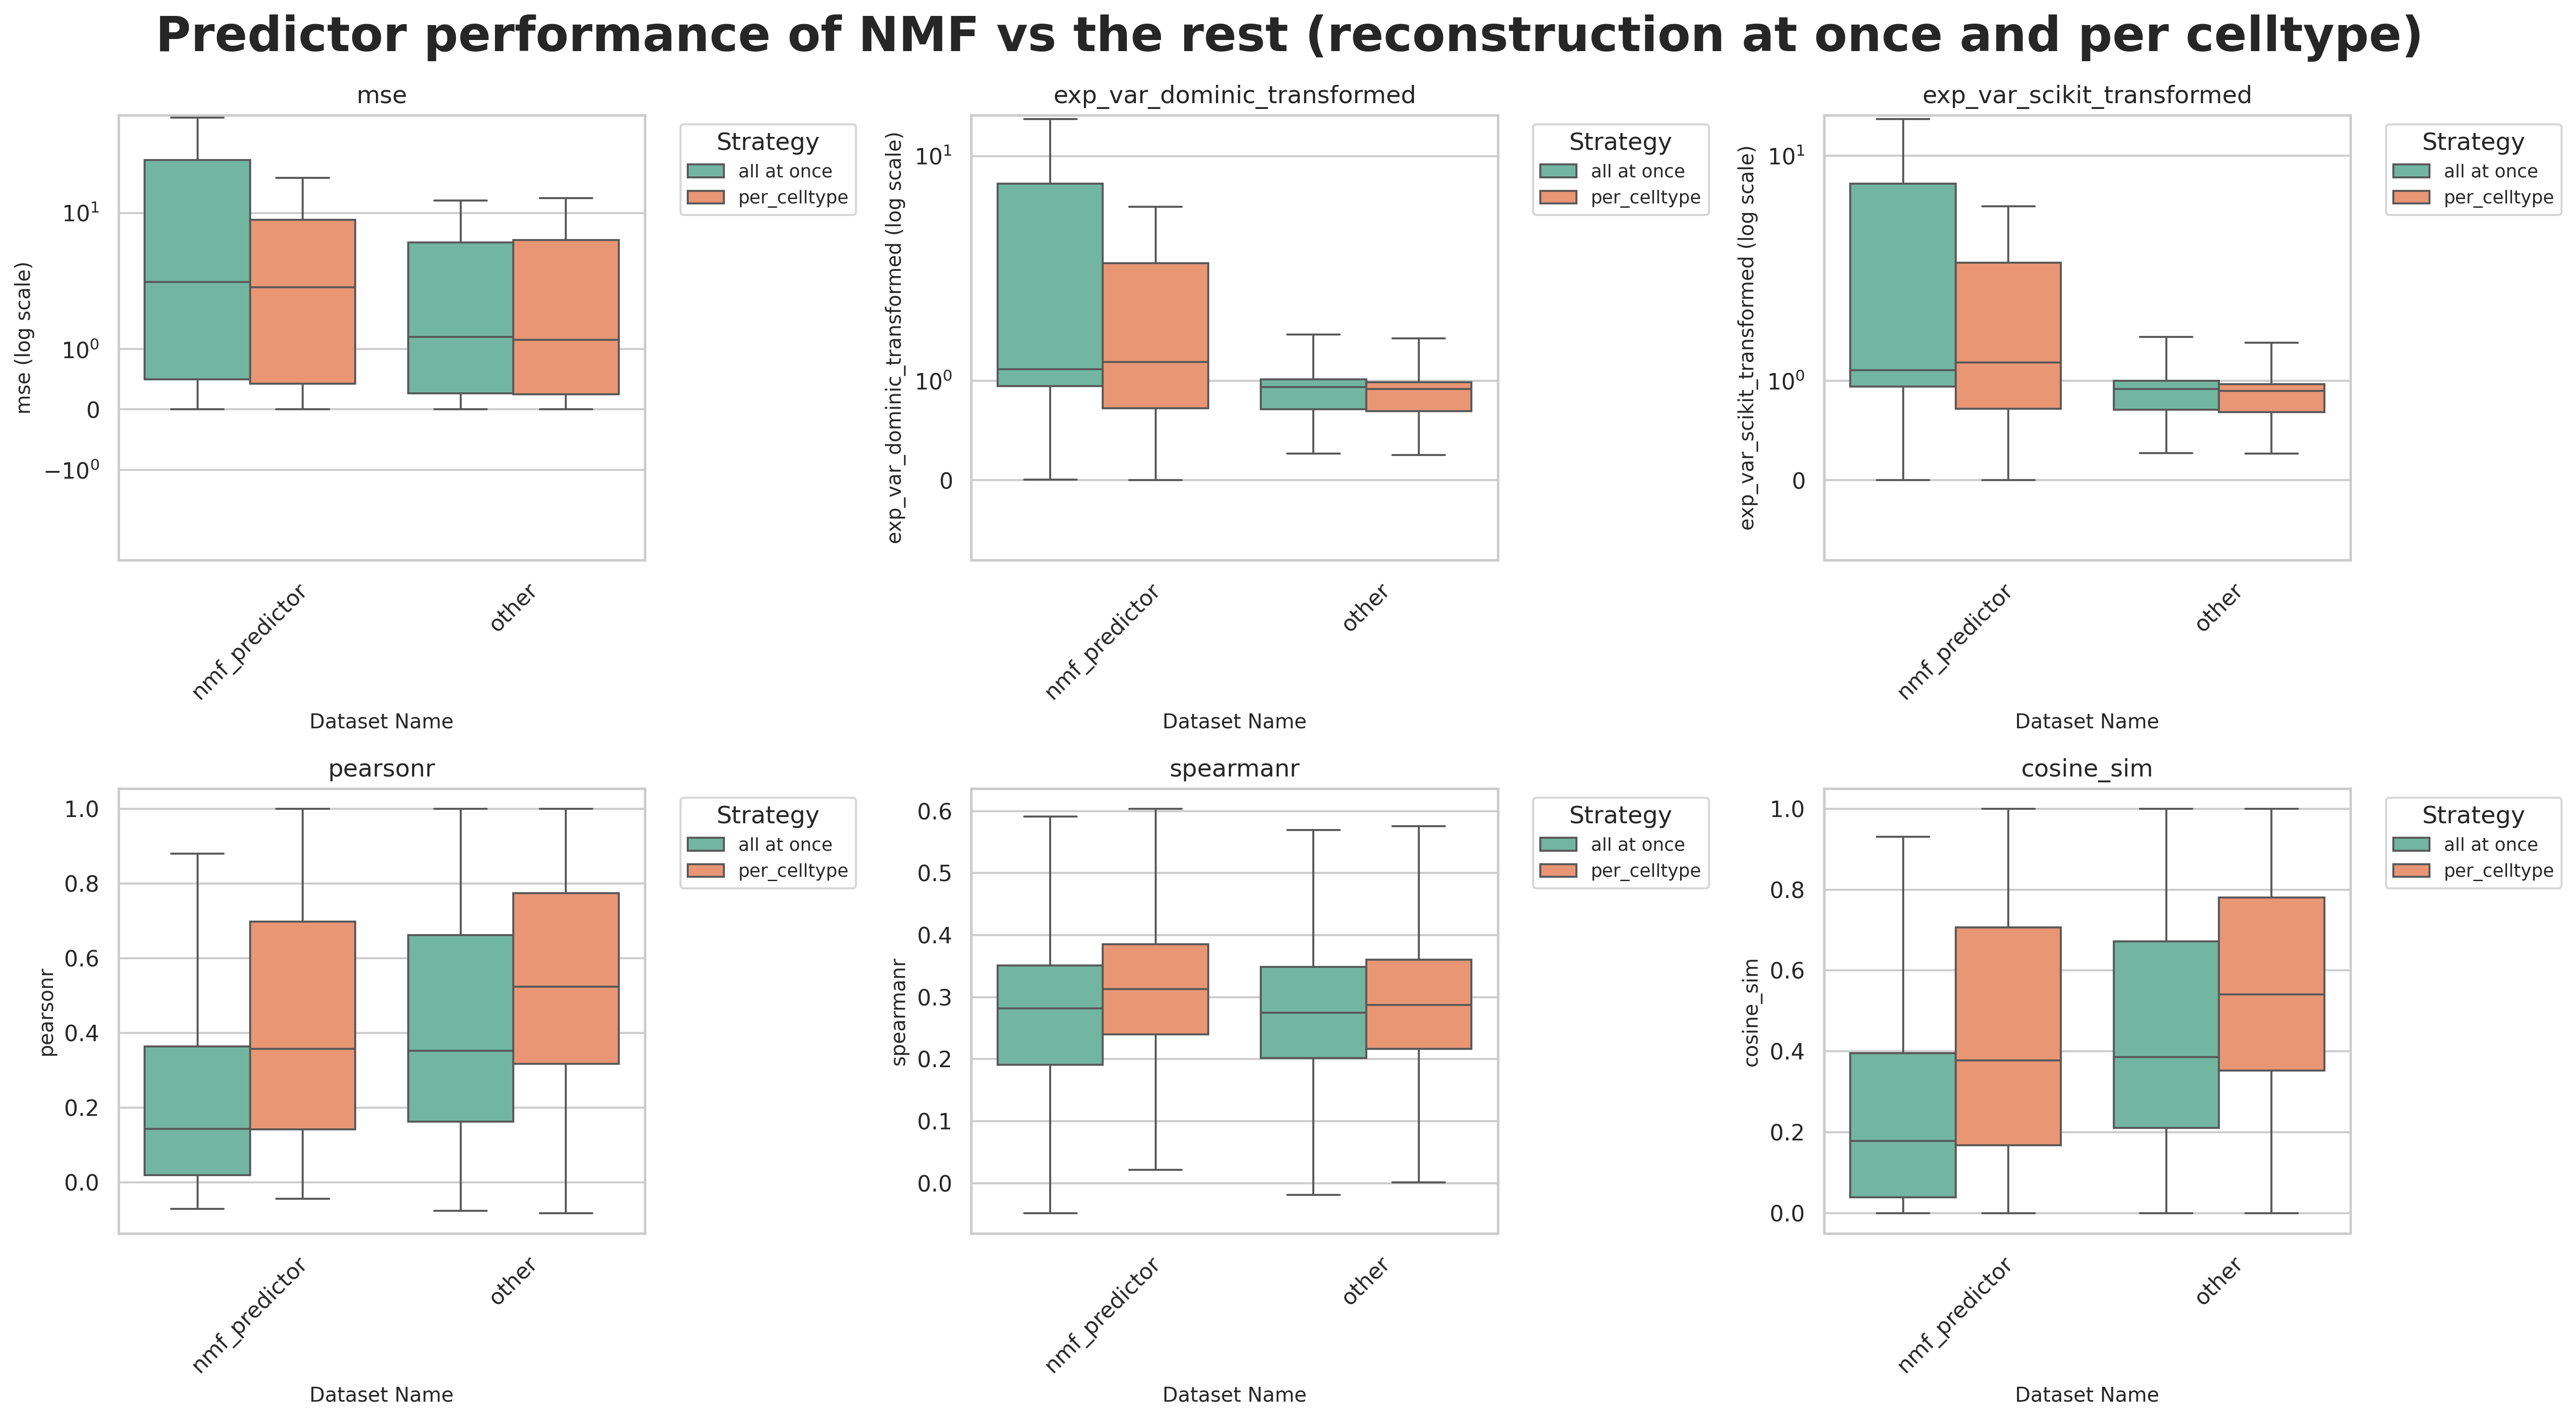

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=300)
axes = axes.flatten()

for ax, (metric, scale) in zip(axes, METRICS):
    sns.boxplot(
        data=df.with_columns(
            pl.when(pl.col("predictor_name") == "nmf_predictor")
            .then(pl.col("predictor_name"))
            .otherwise(pl.lit("other"))
            .alias("nmf_vs_other")
        ),
        x="nmf_vs_other",
        y=metric,
        hue="reconstruction_strategy",
        palette="Set2",
        linewidth=1,
        showfliers=False,
        ax=ax,
    )

    if scale == "log":
        ax.set_yscale("symlog")
        ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
    else:
        ax.set_ylabel(metric, fontsize=10)

    ax.set_xlabel("Dataset Name", fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.tick_params(axis="x", rotation=45)

    ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)

plt.suptitle(
    "Predictor performance of NMF vs the rest (reconstruction at once and per celltype)",
    fontsize=24,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

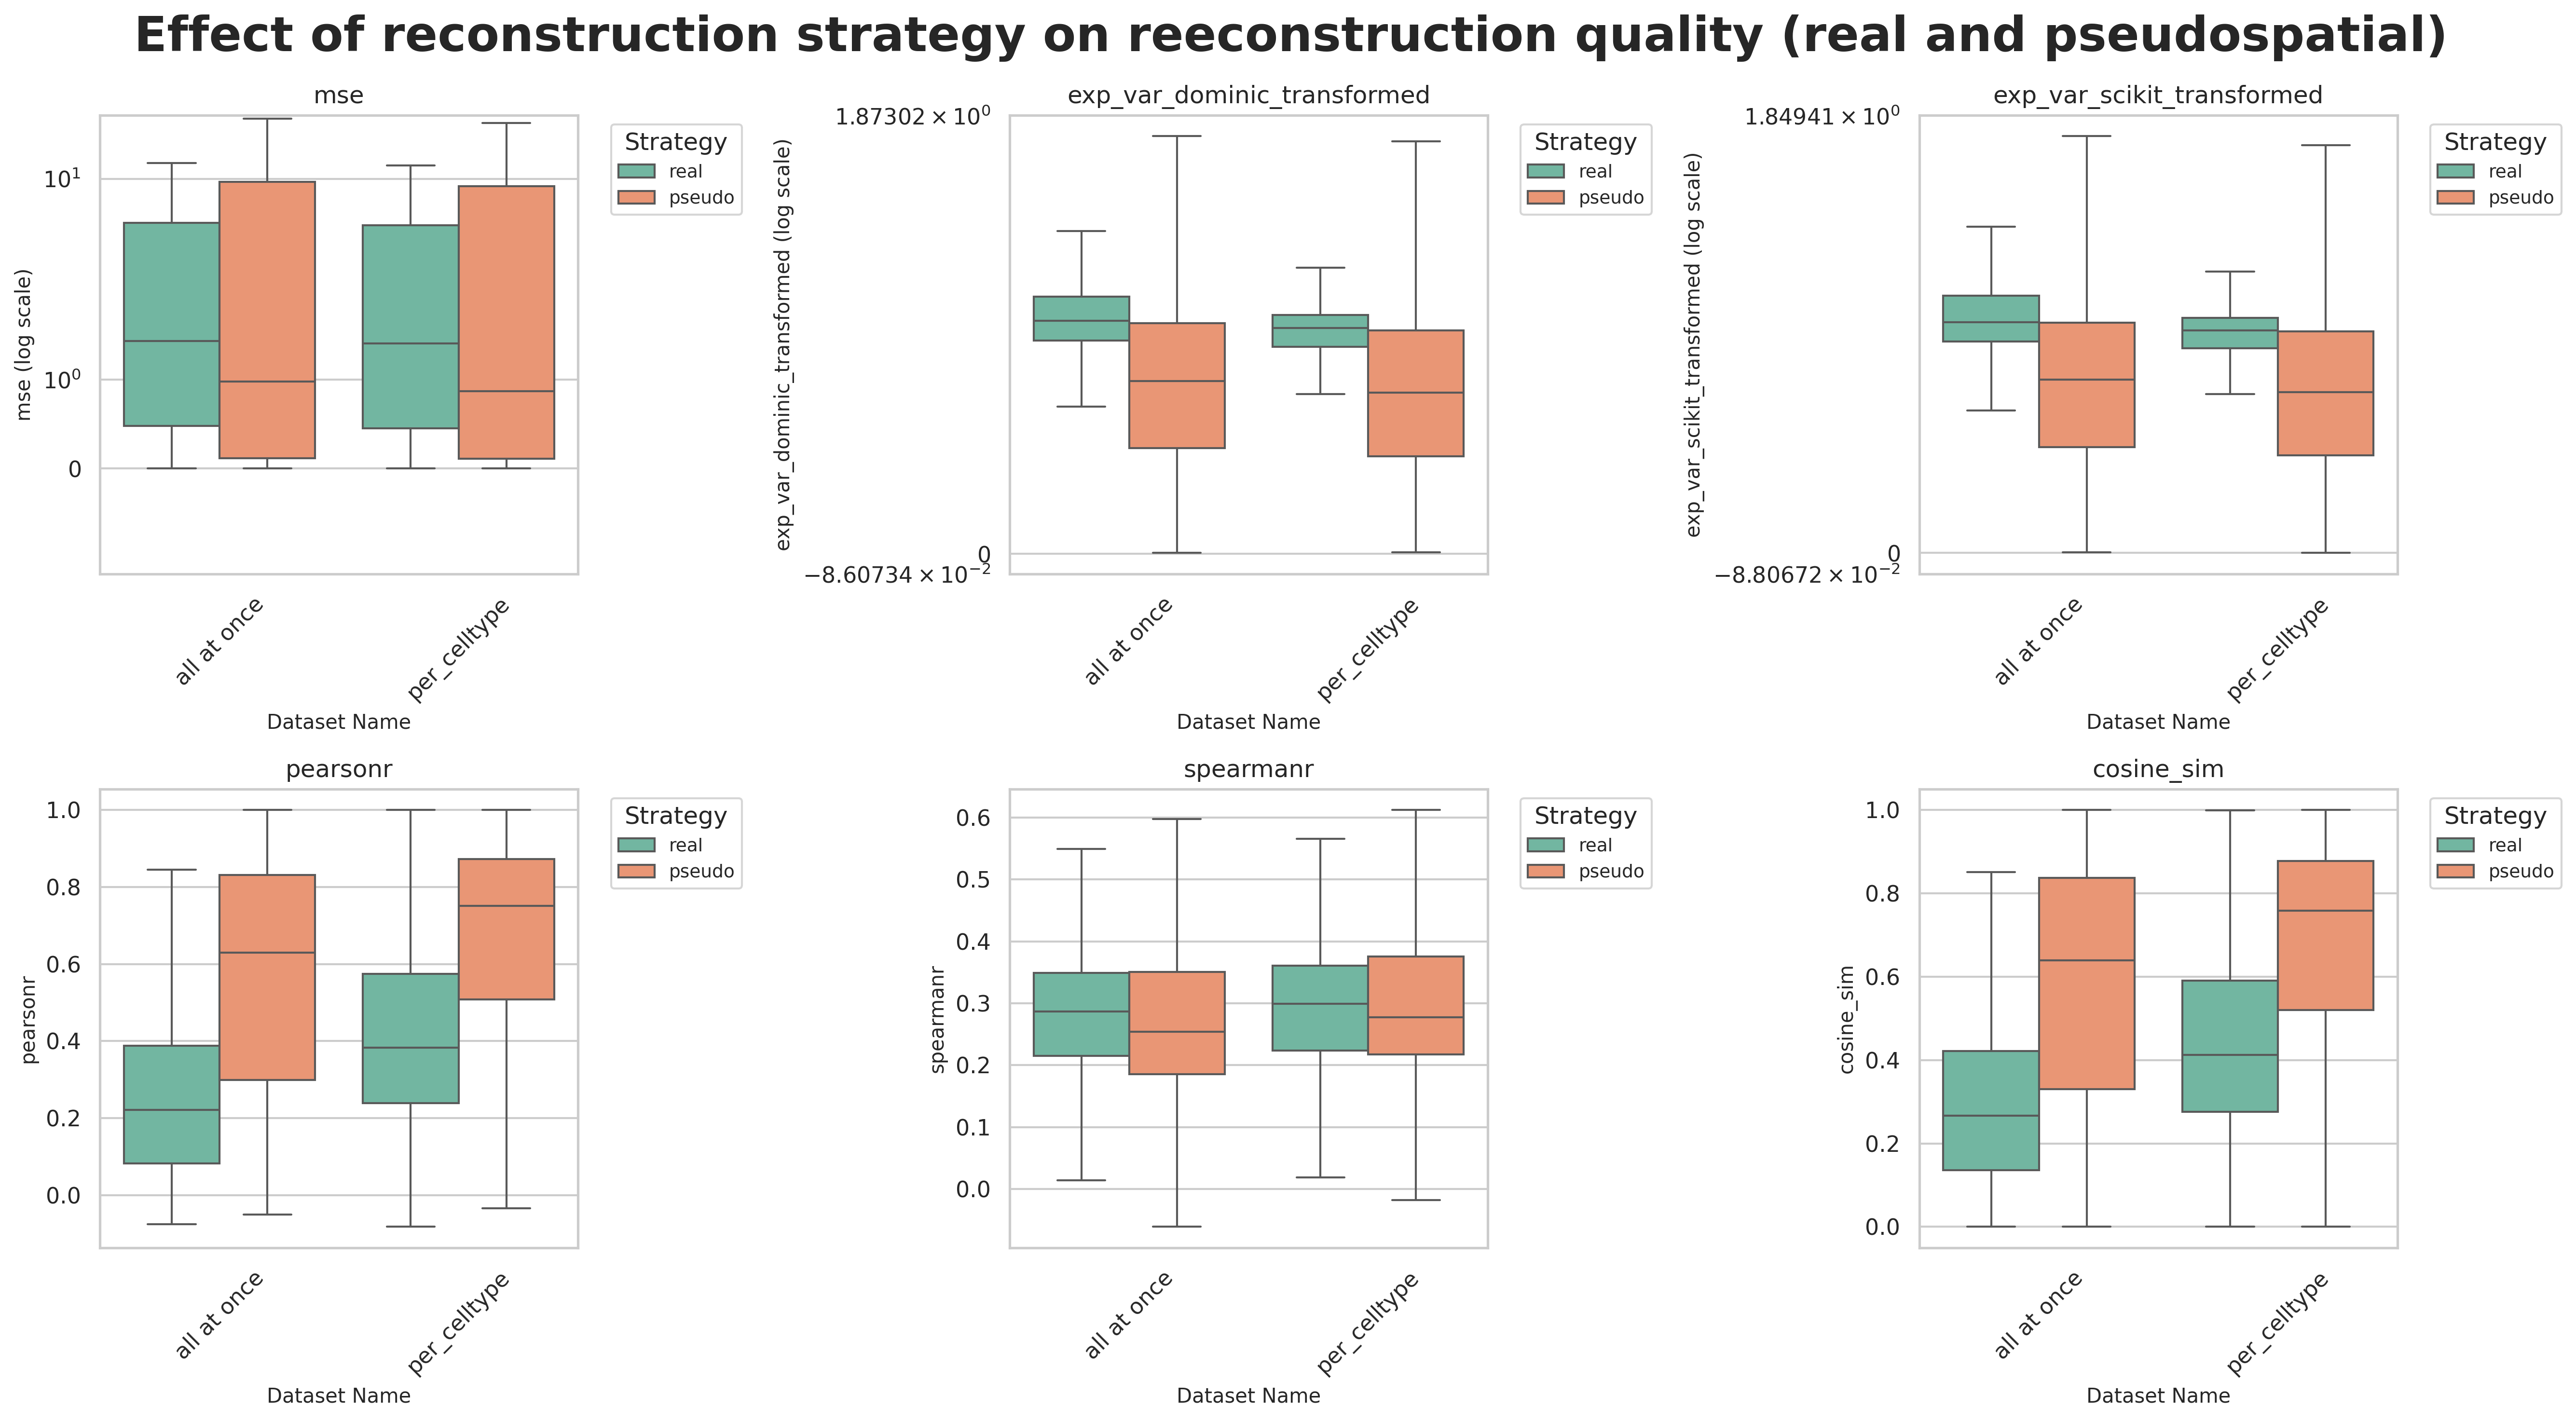

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=300)
axes = axes.flatten()

for ax, (metric, scale) in zip(axes, METRICS):
    sns.boxplot(
        data=df,
        x="reconstruction_strategy",
        y=metric,
        hue="spatial_data",
        palette="Set2",
        linewidth=1,
        showfliers=False,
        ax=ax,
    )

    if scale == "log":
        ax.set_yscale("symlog")
        ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
    else:
        ax.set_ylabel(metric, fontsize=10)

    ax.set_xlabel("Dataset Name", fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.tick_params(axis="x", rotation=45)

    ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)

plt.suptitle(
    "Effect of reconstruction strategy on reeconstruction quality (real and pseudospatial)",
    fontsize=24,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

In [21]:
df

shape: (298_248, 21)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ dataset_n ┆ spatial_d ┆ spatial_d ┆ sc_data_p ┆ … ┆ spearmanr ┆ cosine_si ┆ exp_var_d ┆ exp_var_ │
│ ame       ┆ ata_path  ┆ ata       ┆ ath       ┆   ┆ ---       ┆ m         ┆ ominic_tr ┆ scikit_t │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ ---       ┆ ansformed ┆ ransform │
│ str       ┆ str       ┆ str       ┆ str       ┆   ┆           ┆ f64       ┆ ---       ┆ ed       │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.225823  ┆ 0.011495  ┆ 1.742666  ┆ 1.73985  │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.096073  ┆ 0.012202  ┆ 2.446524  ┆ 2.446412 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.239413  ┆ 0.020105  ┆ 2.561792  ┆ 2.561666 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.157323  ┆ 0.000131  ┆ 3.207321  ┆ 3.206765 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆           ┆          │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mouse_sma ┆ mouse_sma ┆ real      ┆ mouse_sma ┆ … ┆ 0.369906  ┆ 0.003126  ┆ 1158.3674 ┆ 1153.707 │
│ ll_intest ┆ ll_intest ┆           ┆ ll_intest ┆   ┆           ┆           ┆ 32        ┆ 153      │
│ ine_spati ┆ ine_merfi ┆           ┆ ine_sc    ┆   ┆           ┆           ┆           ┆          │
│ al        ┆ sh        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ pbmc3k_pr ┆ null      ┆ pseudo    ┆ pbmc3k_pr ┆ … ┆ 0.233038  ┆ 0.741981  ┆ 0.96782   ┆ 0.932549 │
│ ocessed_p ┆           ┆           ┆ ocessed   ┆   ┆           ┆           ┆           ┆          │
│ seudospat ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ial       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ pbmc3k_pr ┆ null      ┆ pseudo    ┆ pbmc3k_pr ┆ … ┆ 0.254673  ┆ 0.3902    ┆ 0.997959  ┆ 0.974903 │
│ ocessed_p ┆           ┆           ┆ ocessed   ┆   ┆           ┆           ┆           ┆          │
│ seudospat ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ial       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ pbmc3k_pr ┆ null      ┆ pseudo    ┆ pbmc3k_pr ┆ … ┆ 0.308914  ┆ 0.216848  ┆ 1.012675  ┆ 0.994296 │
│ ocessed_p ┆           ┆           ┆ ocessed   ┆   ┆           ┆           ┆           ┆          │
│ seudospat ┆           ┆           ┆   

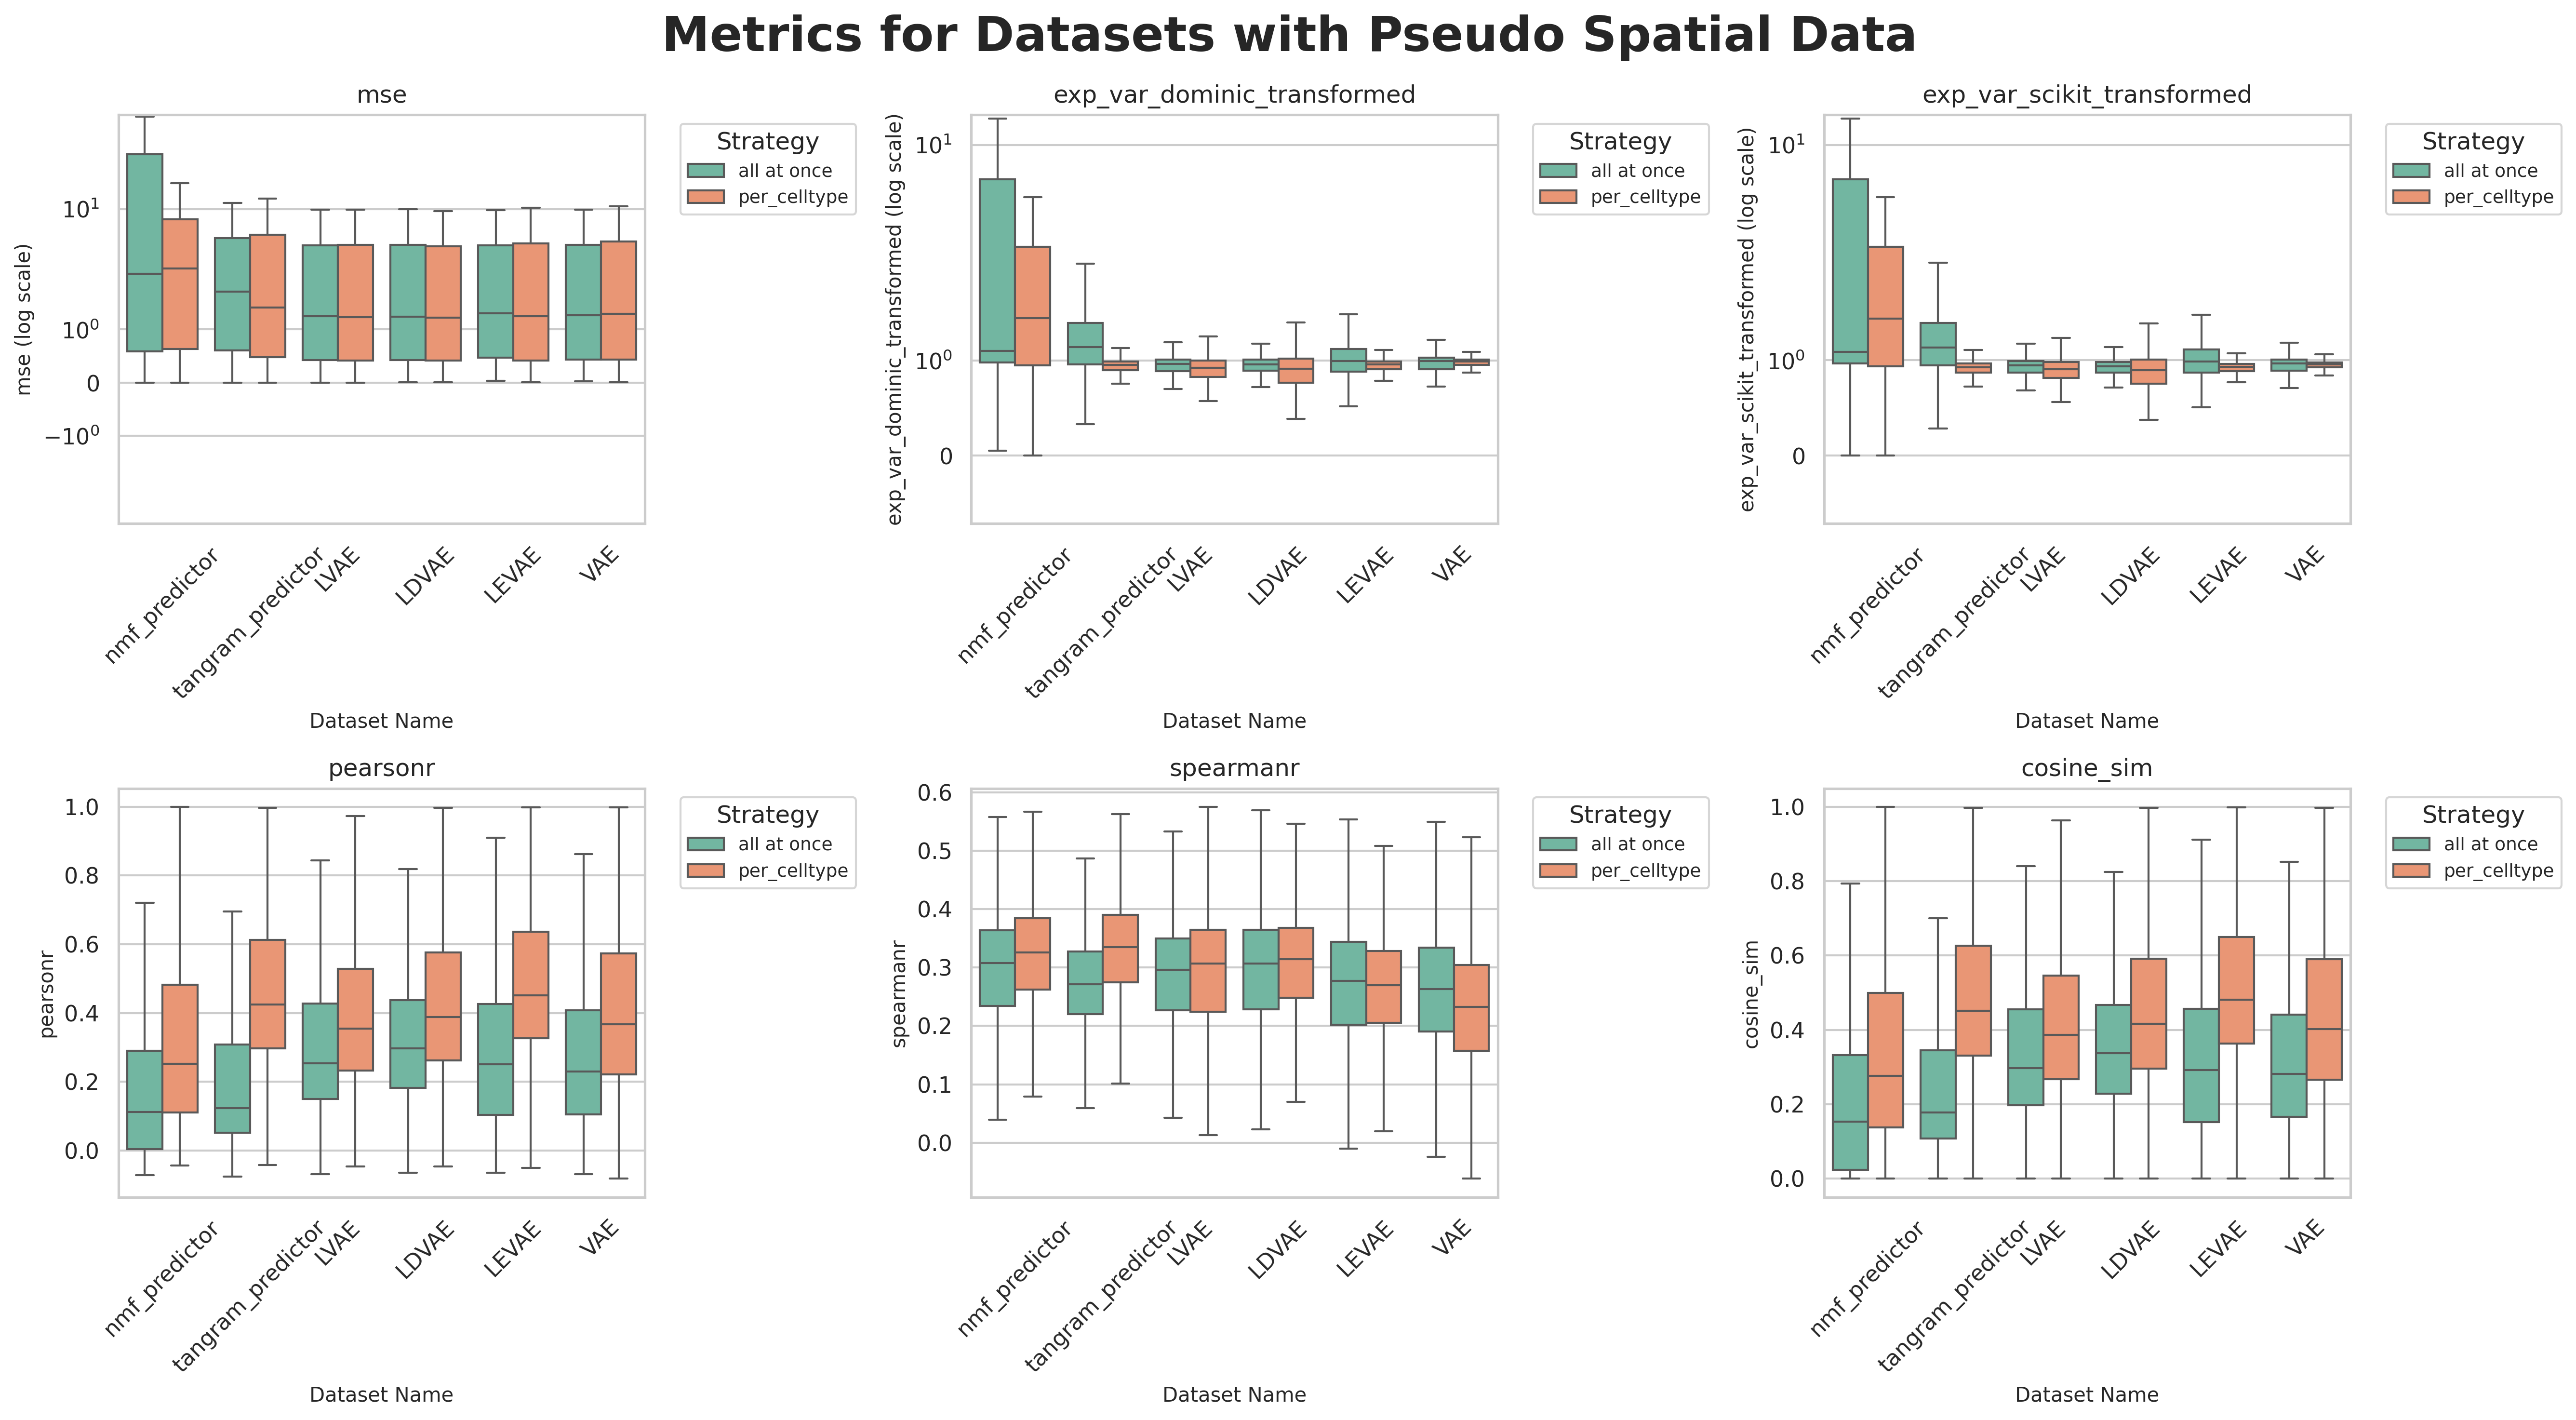

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), dpi=300)
axes = axes.flatten()

for ax, (metric, scale) in zip(axes, METRICS):
    sns.boxplot(
        data=df.filter(pl.col("spatial_data") == "real"),
        x="predictor_name",
        y=metric,
        hue="reconstruction_strategy",
        palette="Set2",
        linewidth=1,
        showfliers=False,
        ax=ax,
    )

    if scale == "log":
        ax.set_yscale("symlog")
        ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
    else:
        ax.set_ylabel(metric, fontsize=10)

    ax.set_xlabel("Dataset Name", fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.tick_params(axis="x", rotation=45)

    ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
plt.suptitle(
    "Metrics for Datasets with Pseudo Spatial Data", fontsize=24, fontweight="bold"
)
plt.tight_layout()
plt.show()

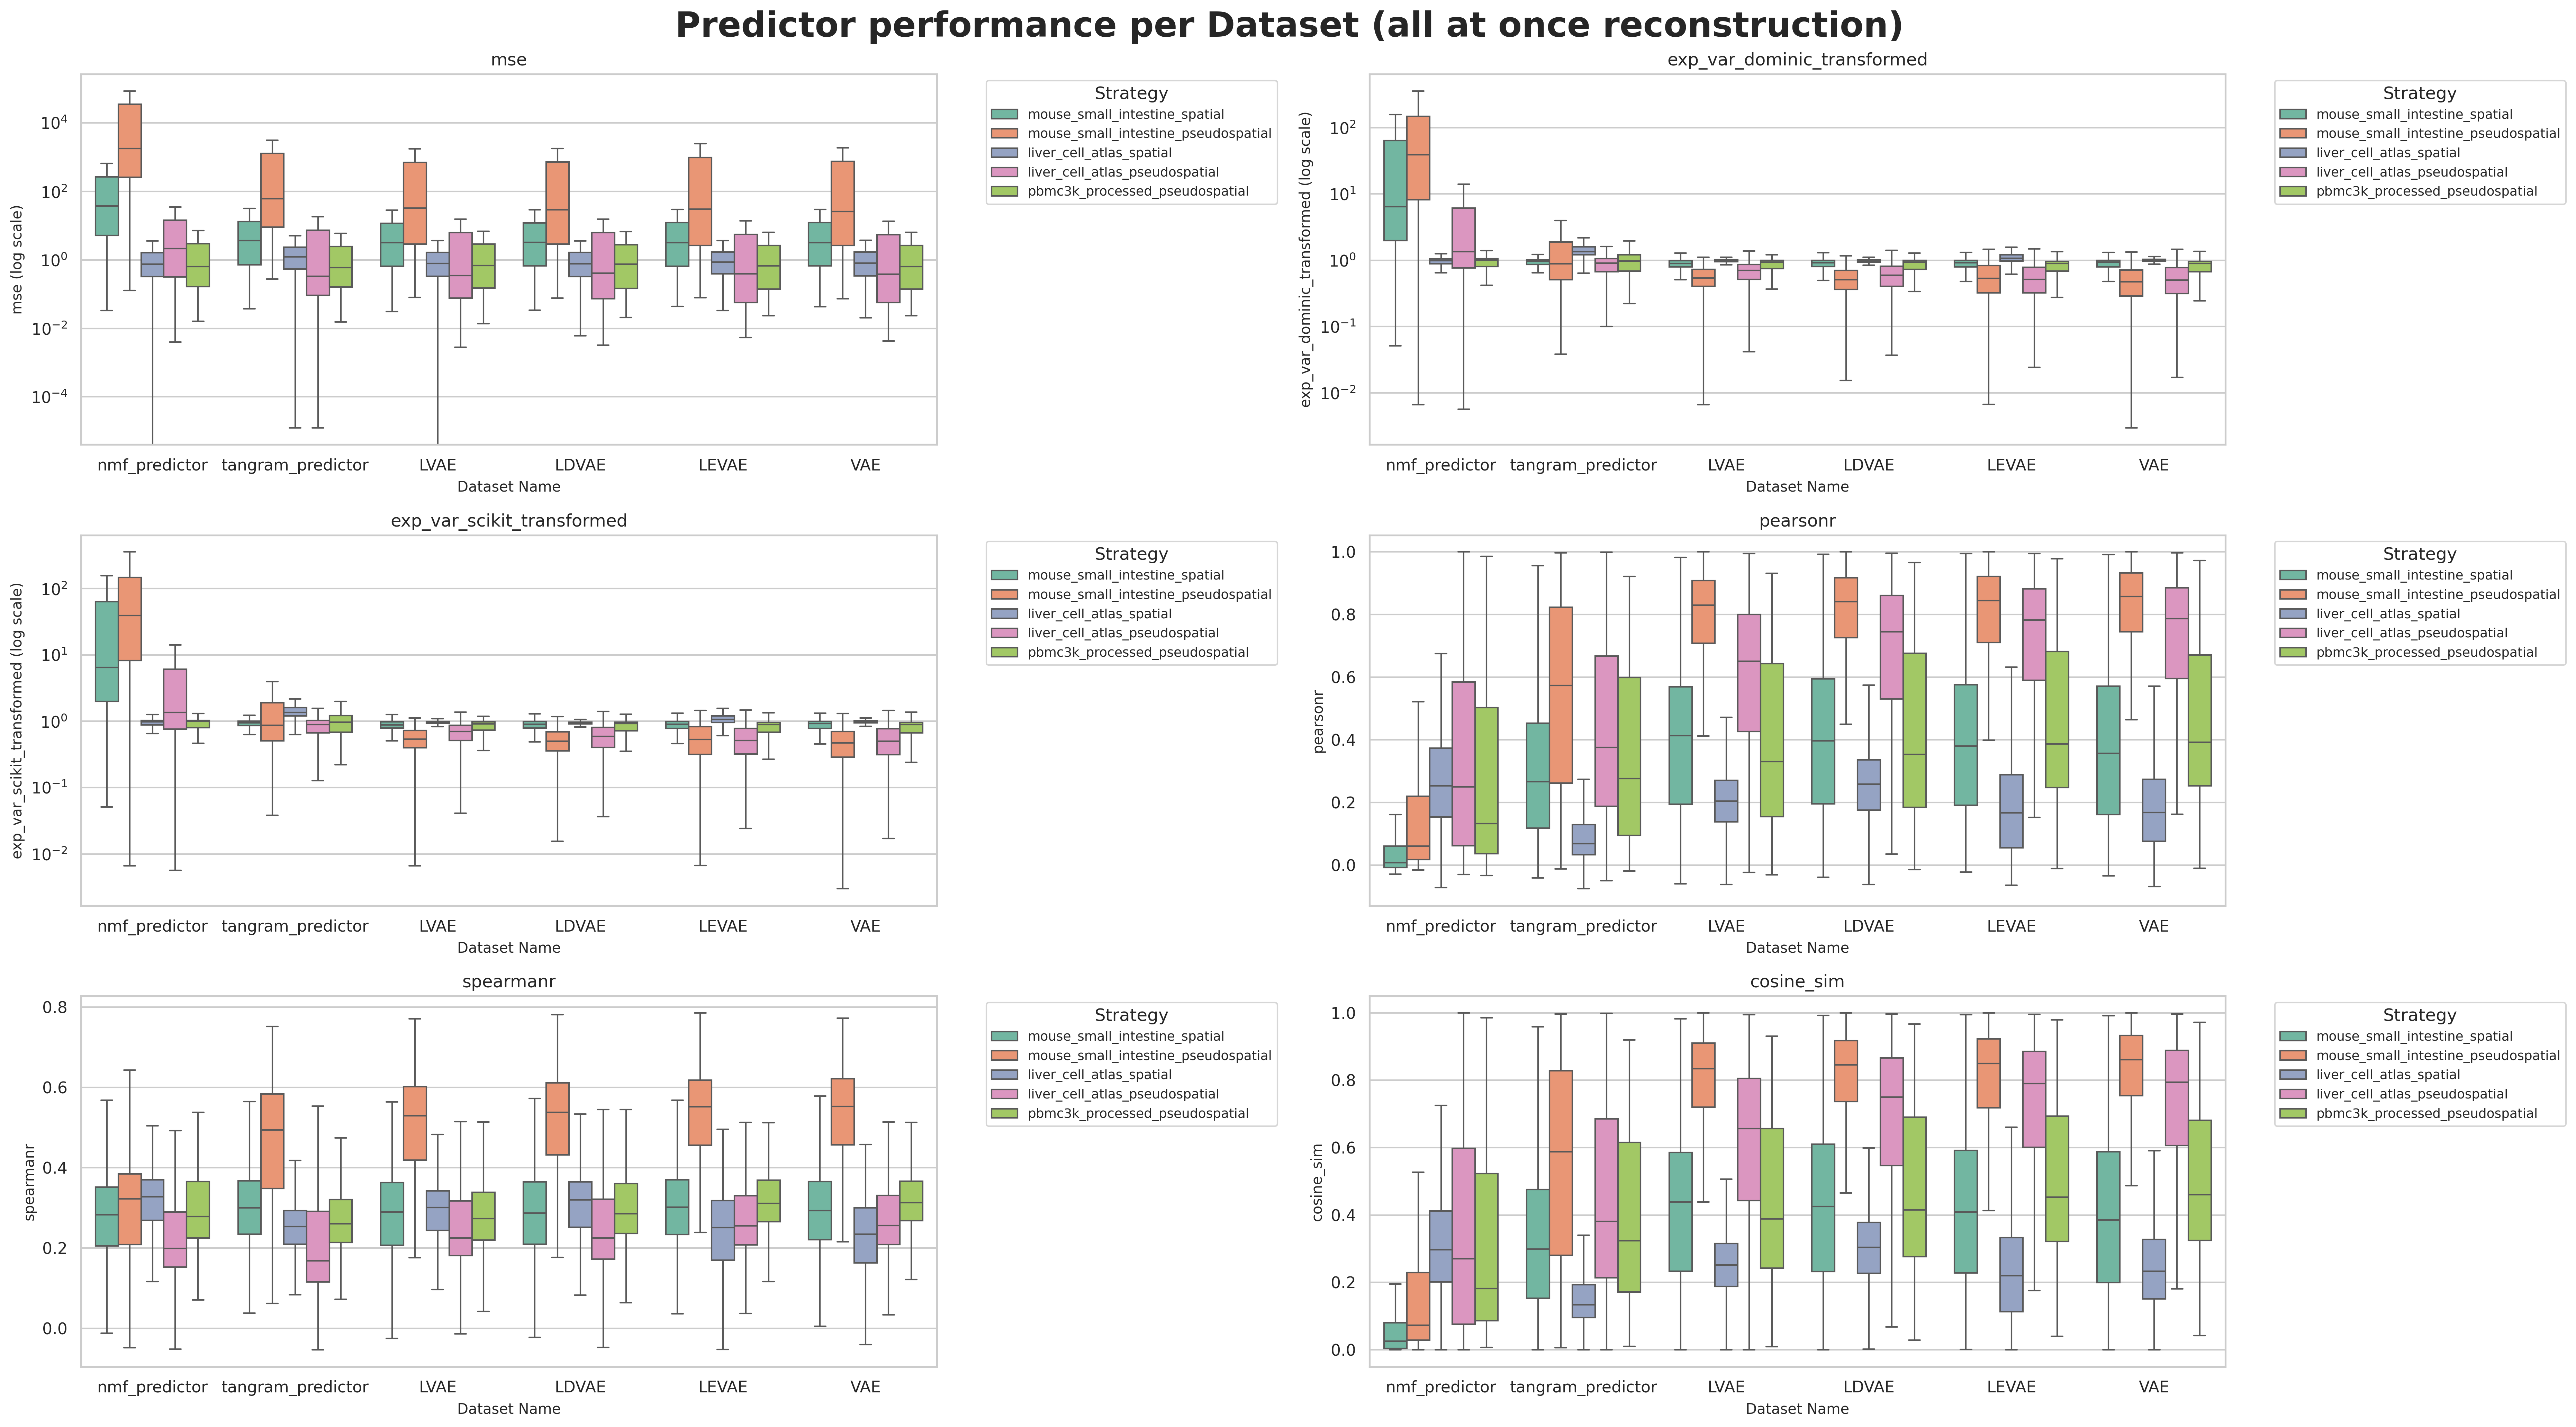

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(25, 14), dpi=300)
axes = axes.flatten()

for ax, (metric, scale) in zip(axes, METRICS):
    sns.boxplot(
        data=df.filter(pl.col("reconstruction_strategy") == "all at once"),
        x="predictor_name",
        y=metric,
        hue="dataset_name",
        palette="Set2",
        linewidth=1,
        showfliers=False,
        ax=ax,
    )

    if scale == "log":
        ax.set_yscale("log")
        ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
    else:
        ax.set_ylabel(metric, fontsize=10)

    ax.set_xlabel("Dataset Name", fontsize=10)
    ax.set_title(metric, fontsize=12)

    ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)

plt.suptitle(
    "Predictor performance per Dataset (all at once reconstruction)",
    fontsize=24,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

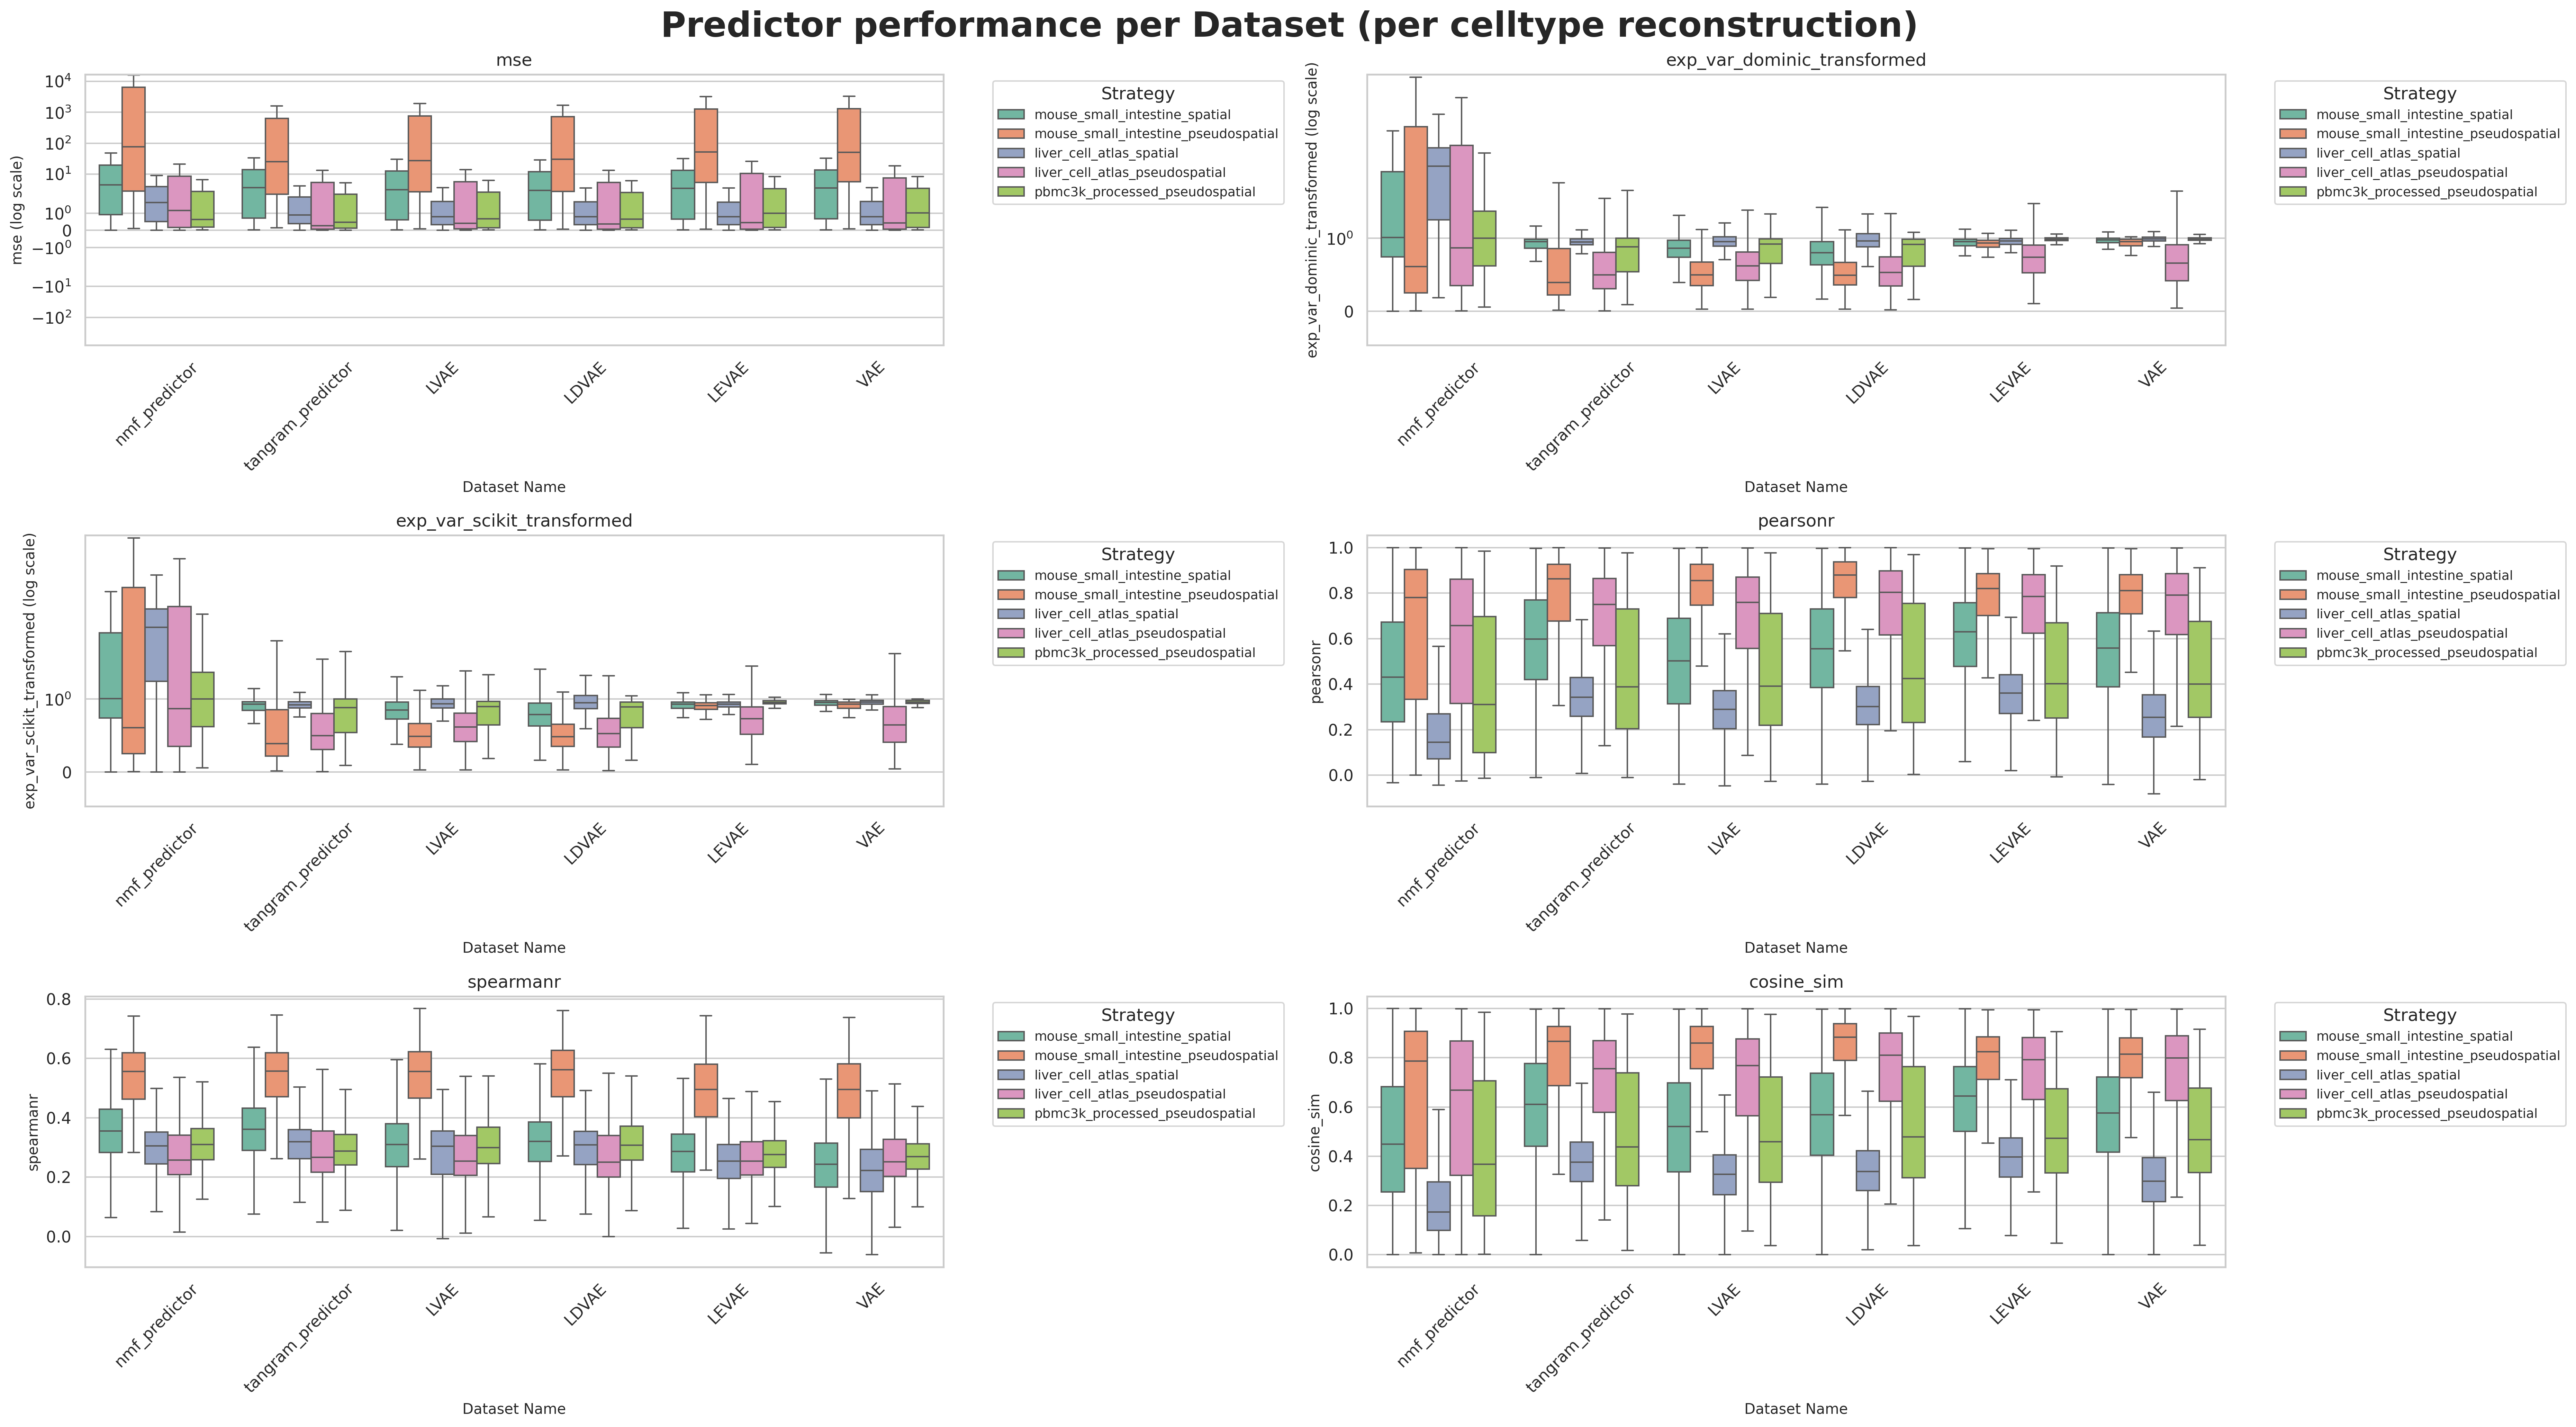

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(25, 14), dpi=300)
axes = axes.flatten()

for ax, (metric, scale) in zip(axes, METRICS):
    sns.boxplot(
        data=df.filter(pl.col("reconstruction_strategy") == "per_celltype"),
        x="predictor_name",
        y=metric,
        hue="dataset_name",
        palette="Set2",
        linewidth=1,
        showfliers=False,
        ax=ax,
    )

    if scale == "log":
        ax.set_yscale("symlog")
        ax.set_ylabel(f"{metric} (log scale)", fontsize=10)
    else:
        ax.set_ylabel(metric, fontsize=10)

    ax.set_xlabel("Dataset Name", fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.tick_params(axis="x", rotation=45)

    ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)

plt.suptitle(
    "Predictor performance per Dataset (per celltype reconstruction)",
    fontsize=24,
    fontweight="bold",
)
plt.tight_layout()
plt.show()